In [1]:
import numpy as np
import random
import math
from math import exp
import os
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from logres import lin_model, MCMC
from logres import MCMC as lin_MCMC
from Bayesneuralnet_regcls import Network, scikit_linear_mod
from Bayesneuralnet_regcls import MCMC 
from convergence_test import gelman_rubin

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn import preprocessing, metrics
import seaborn as sns


In [2]:
def squared_error(prediction, actual):
    return (
        np.sum(np.square(prediction - actual)) / prediction.shape[0]
    ) 

In [3]:
def accuracy(prediction, actual):
    count = 0
    for i in range(prediction.shape[0]):
        if prediction[i] == actual[i]:
            count += 1
    return 100 * count/prediction.shape[0]


In [4]:
def get_dataset_details(problem):

    w_limit =  0.025 # step size for w
    tau_limit = 0.2 # step size for eta
    save = True
    name = ""
    
    
    
    if problem == "Lazer":
        # problem 1
        data = np.genfromtxt('data/Lazer/Lazer_processed.csv',delimiter=',')
        #traindata = np.loadtxt("data/Lazer/train.txt")
        #testdata = np.loadtxt("data/Lazer/test.txt")  #
        name = "Lazer"
        hidden = 5
        input = 4  
        output = 1
        prob_type = 'regression'
        numSamples = 50000 
        #numSamples = 500
        train_ratio = 0.6
                
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
        
    elif problem == "Sunspot":
        # problem 2
        data = np.genfromtxt('data/Sunspot/Sunspots.csv',delimiter=',')
        #traindata = np.loadtxt("data/Sunspot/train.txt")
        #testdata = np.loadtxt("data/Sunspot/test.txt")  #
        name = "Sunspot"
        hidden = 5
        input = 4  #
        output = 1
        prob_type = 'regression' 
        numSamples = 50000 
        
        train_ratio = 0.6
                
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]

    
    elif problem == "abalone":
        # abalone
        data = np.genfromtxt('data/abalone/abalone.csv',delimiter=',')
        name = "abalone"
        hidden = 12
        input = 8 #input
        output = 1
        train_ratio = 0.6

        
        
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        data = scaler.transform(data)
        traindata = data[: int(train_ratio * data.shape[0])]
        testdata = data[int(train_ratio * data.shape[0]): ]

        
        prob_type = 'regression' 
        numSamples = 50000
        #numSamples = 200
    
    elif problem == "Iris":
        # problem 4
        data  = np.genfromtxt('data/iris.csv',delimiter=';')
        classes = data[:,4].reshape(data.shape[0],1)-1
        features = data[:,0:4]#Normalizing Data
    
        name = "Iris"
        hidden = 12
        input = 4 #input
        output = 3
    
        for k in range(input):
            mean = np.mean(features[:,k])
            dev = np.std(features[:,k])
            features[:,k] = (features[:,k]-mean)/dev
            train_ratio = 0.6 #choose
            indices = np.random.permutation(features.shape[0])
            traindata = np.hstack([features[indices[:int(train_ratio*features.shape[0])],:],classes[indices[:int(train_ratio*features.shape[0])],:]])
            testdata = np.hstack([features[indices[int(train_ratio*features.shape[0])]:,:],classes[indices[int(train_ratio*features.shape[0])]:,:]])
            prob_type = 'classification'
        numSamples = 50000 
        
    elif problem == "Ionosphere":
        # problem 5
        data = np.genfromtxt('data/ionesphere/ionosphere.csv',delimiter=',')
        print(data)
        
        #traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
        #testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
        
        name = "Ionosphere"
        hidden = 50
        input = 34 #input
        output = 2
        prob_type = 'classification'
        numSamples = 50000

        train_ratio = 0.6
        
        np.random.shuffle(data)
        scaler = MinMaxScaler()
        scaler.fit(data)
        traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
        testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
        
    elif problem == "abalone_classification":
        # abalone classification
        data = np.genfromtxt('data/abalone_classification/abalone_classification.csv',delimiter=',')
        name = "abalone_classification"
        hidden = 12
        input = 8 #input
        output = 4
        train_ratio = 0.6

        
        
        np.random.shuffle(data)
        
        traindata = data[: int(train_ratio * data.shape[0])]
        testdata = data[int(train_ratio * data.shape[0]): ]

        
        prob_type = 'classification' 
        numSamples = 50000
        #numSamples = 200

    elif problem == "exp_325":
        # exp_325
        
        name = "exp_325"
        hidden = 8
        input = 3 #input
        output = 6
        
        
        prob_type = 'classification' 
        numSamples = 50000

        x_train, x_test, y_train, y_test = read_preprocess_data("data/exp_325/Unbalanced_325.csv")
        #numSamples = 200
        traindata = np.concatenate((x_train, y_train[:, np.newaxis]), axis=1)
        testdata = np.concatenate((x_test, y_test[:, np.newaxis]), axis=1)

    elif problem == "exp_310":
        # exp_310
        
        name = "exp_310"
        hidden = 8
        input = 3 #input
        output = 6
        
        
        prob_type = 'classification' 
        numSamples = 50000

        x_train, x_test, y_train, y_test = read_preprocess_data("data/exp_310/Unbalanced_310.csv")
        #numSamples = 200
        traindata = np.concatenate((x_train, y_train[:, np.newaxis]), axis=1)
        testdata = np.concatenate((x_test, y_test[:, np.newaxis]), axis=1)
        
    

    return traindata,testdata, prob_type, [input,hidden,output],numSamples

def read_preprocess_data(filename):
    
    #df = pd.read_csv("data/exp_325/Unbalanced_325.csv")
    df = pd.read_csv(filename)

    df_filtered = df[["Bulk","Porosity", "Resistivity"]]
    print(df_filtered.describe())

    

    normalize = True

    if normalize:


        #Use minmax normalization to get data in 0-1 rnage for lstm model
        x = df_filtered.values #returns a numpy array of the data frame
        min_max_scaler = MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        
        
        # Splitting data in traning and testting set
        all_data = pd.DataFrame(x_scaled).values


    else:
        all_data = df_filtered.values
        


    encoded_labels = df[["Species"]]
    
    le = preprocessing.LabelEncoder()
    
    encoded_labels =  le.fit_transform(encoded_labels)
    labels = list(le.classes_)


    balance_data = False
    if balance_data:
        resample = NeighbourhoodCleaningRule()
        all_data, encoded_labels = resample.fit_resample(all_data, encoded_labels)

    
    desc_data = False
    if desc_data:

        counter = Counter(encoded_labels)

        for k,v in counter.items():
            per = v / len(encoded_labels) * 100
            print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

        #plt.bar(counter.keys(), counter.values())
        plt.bar(labels, counter.values())
        plt.xticks(rotation = 30)
        
        #encoded_labels.value_counts().plot(kind='bar')
        #plt.show()

    
    x_train, x_test, y_train, y_test = train_test_split(all_data, encoded_labels, test_size=0.4, shuffle=True)

    return x_train, x_test, y_train, y_test

In [5]:
def histogram_trace(pos_points, fname = None):
    '''
    This function will create a histogram and traceplot of the MCMC results.
    ''' 
    size = 15

    plt.tick_params(labelsize=size)
    params = {'legend.fontsize': size, 'legend.handlelength': 2}
    plt.rcParams.update(params)
    plt.grid(alpha=0.75)

    plt.hist(pos_points,  bins = 20, color='#0504aa', alpha=0.7)   
    plt.title("Posterior distribution ", fontsize = size)
    plt.xlabel(' Parameter value  ', fontsize = size)
    plt.ylabel(' Frequency ', fontsize = size) 
    plt.tight_layout()
    if not fname is None: 
        plt.savefig(fname + '_posterior.png')
        plt.clf()
    else:
        plt.show()
        
    plt.tick_params(labelsize=size)
    params = {'legend.fontsize': size, 'legend.handlelength': 2}
    plt.rcParams.update(params)
    plt.grid(alpha=0.75) 
    plt.plot(pos_points)   

    plt.title("Parameter trace plot", fontsize = size)
    plt.xlabel(' Number of Samples  ', fontsize = size)
    plt.ylabel(' Parameter value ', fontsize = size)
    plt.tight_layout()
    if not fname is None:
        plt.savefig(fname + '_trace.png') 
        plt.clf()
    else:
        plt.show()



In [27]:
def histogram_trace_side_by_side(pos_points,xrange, fname=None):
    """
    This function creates a histogram and trace plot of the MCMC results side by side.

    Args:
        pos_points (array-like): Array of MCMC sampled parameter values.
        fname (str, optional): File name prefix to save the plots. If None, the plots are displayed interactively.
    """
    size = 14

    # Set up the figure and axes for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plt.subplots_adjust(wspace=0.3)  # Adjust spacing between plots

    # Histogram plot
    axes[0].hist(pos_points, bins=20,range=xrange, color='#0504aa', alpha=0.7)
    axes[0].set_title("Posterior Distribution", fontsize=size)
    axes[0].set_xlabel("Parameter Value", fontsize=size)
    axes[0].set_ylabel("Probability", fontsize=size)
    #axes[0].grid(alpha=0.75)
    axes[0].tick_params(labelsize=size)

    # Trace plot
    axes[1].plot(pos_points, color='#0504aa', alpha=0.7)
    axes[1].set_title("Parameter Trace Plot", fontsize=size)
    axes[1].set_xlabel("Number of Samples", fontsize=size)
    axes[1].set_ylabel("Parameter Value", fontsize=size)
    axes[1].set_ylim(xrange[0],xrange[1])
    #axes[1].grid(alpha=0.75)
    axes[1].tick_params(labelsize=size)

    # Save or show the plots
    plt.tight_layout()
    if fname:
        plt.savefig(fname + '_histogram_trace.svg')
        plt.clf()
    else:
        plt.show()
def convergence_analysis(name,traindata, testdata, problem_type, network_structure,numSamples, folder):
    results_folder = folder + name 
    
    count = 1
    #pos_weights = np.array(pos_weights)
    
   
    bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)

    

    df = pd.DataFrame()

    num_runs = 1
    num_trace = 5
    pw_prun_list = []
    resample_burnin = 100
    
    for prun_method in ["stn"]:#,"spn","rnd"]:
        """
        mse_025 = []
        mse_resampled_025 = []
        mse_050 = []
        mse_resampled_050 = []
        """
        mse_075 = []
        count_075 = 0
        count_trace_075 = 0
        mse_resampled_075 = []
        count_resample_075 = 0
        count_trace_resampled_075 = 0
    
        for p_w in os.listdir(results_folder):
     
            if p_w.startswith(f"pos_w_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_075 < num_runs:
                # Prints only text file present in My Folder
                #mse_075.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                count_075 += 1
                pos_w = np.loadtxt(results_folder+"\\"+p_w)
                
                for p_r in os.listdir(results_folder):   
                    if p_r.startswith(f"pos_r_{prun_method}_0.75") and not(p_r.endswith('result.txt')) and p_r.endswith(".txt") and count_resample_075 < num_runs:
                        # Prints only text file present in My Folder
                        #mse_resampled_075.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))
                        count_resample_075 += 1
                        pos_r = np.loadtxt(results_folder+"\\"+p_r)
                        
                        for i in range(pos_w.shape[1]):
                            if np.round(np.mean(pos_w[:, i]),0)!=0 and count_trace_075 < num_trace:
                                print("mean of pos w ", np.mean(pos_w[:, i]), " i ", i )

                                data1 = pos_w[:, i]
                                data2 = pos_r[resample_burnin:, i]
                                min_hist = min(data1.min(), data2.min())
                                max_hist = max(data1.max(), data2.max())
                                xrange = [min_hist, max_hist]

                                
                                histogram_trace_side_by_side(pos_w[:, i],xrange,f"{folder}trace_plots\\{name}_{prun_method}_pos_w_{i}")
                                count_trace_075 += 1
                        

                                                
                                #for i in range(pos_r.shape[1]):
                                #if np.round(np.mean(pos_r[:, i]),0)!= 0 and count_trace_resampled_075 < num_trace:
                                print("mean of pos r ", np.mean(pos_r[resample_burnin:, i]), " i ", i)
                                histogram_trace_side_by_side(pos_r[resample_burnin:, i],xrange, f"{folder}trace_plots\\{name}_{prun_method}_pos_r_{i}" )
                                count_trace_resampled_075 += 1
                                
                        mse_075.append(1)
                        mse_resampled_075.append(1)
                   
            
            #print(count)
        count += 1 
        
        #print(count)
        print("---------------------------------------")
        print(prun_method)
        '''
        print("mse_025 = " ,len(mse_025[:20]))
        print("mse_resampled_025 = " ,len(mse_resampled_025[:20])) 
        print("mse_050 = " ,len(mse_050[:20]))  
        print("mse_resampled_050 = " ,len(mse_resampled_050[:20]))  
        '''
        print("mse_075 = " ,len(mse_075))  
        print("mse_resampled_075 = " ,len(mse_resampled_075))  
        print("---------------------------------------")



In [45]:
    
def convergence_analysis_galman_rubin(name,traindata, testdata, problem_type, network_structure,numSamples, folder):
    results_folder = folder + name 
    
    count = 1
    #pos_weights = np.array(pos_weights)
    
   
    bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)

    

    df = pd.DataFrame()

    num_runs = 5
    
    pw_prun_list_0 =[]
    pw_prun_list_025 =[]
    pw_prun_resample_list_025 = []
    pw_prun_list_025 =[]
    pw_prun_resample_list_025 = []  
    pw_prun_list_050 =[]
    pw_prun_resample_list_050 = []  
    pw_prun_list_075 =[]
    pw_prun_resample_list_075 = []  
    resample_burnin = 100
    
    for prun_method in ["stn"]:#,"spn","rnd"]:

        mse_0 = []
        count_0 = 0
        
        
        mse_025 = []
        count_025 = 0
        mse_resampled_025 = []
        count_resample_025 = 0
        
        mse_050 = []
        count_050 = 0
        mse_resampled_050 = []
        count_resample_050 = 0
        
        mse_075 = []
        count_075 = 0
        mse_resampled_075 = []
        count_resample_075 = 0
        
        
        for p_w in os.listdir(results_folder):
            '''
            if p_w.startswith("pos_w_") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_0 < num_runs:                
                pos_w = np.loadtxt(results_folder+"\\"+p_w)
                pw_prun_list_0.append( np.array(pos_w))
                count_0 += 1
                mse_0.append(1)
                
            if p_w.startswith(f"pos_w_{prun_method}_0.25") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_025 < num_runs:
                # Prints only text file present in My Folder
                #mse_075.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                
                pos_w = np.loadtxt(results_folder+"\\"+p_w)
                pw_prun_list_025.append( np.array(pos_w))
                count_025 += 1
                mse_025.append(1)
               
            if p_w.startswith(f"pos_r_{prun_method}_0.25") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_resample_025 < num_runs:
                # Prints only text file present in My Folder
                #mse_resampled_075.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))
                
                pos_r = np.loadtxt(results_folder+"\\"+p_w)
                pw_prun_resample_list_025.append( np.array(pos_r[resample_burnin:,]))
                count_resample_025 += 1
                mse_resampled_025.append(1)
    
            if p_w.startswith(f"pos_w_{prun_method}_0.50") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_050 < num_runs:
                # Prints only text file present in My Folder
                #mse_075.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                
                pos_w = np.loadtxt(results_folder+"\\"+p_w)
                pw_prun_list_050.append( np.array(pos_w))
                count_050 += 1
                mse_050.append(1)

            if p_w.startswith(f"pos_r_{prun_method}_0.50") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_resample_050 < num_runs:
                # Prints only text file present in My Folder
                #mse_resampled_075.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))
                
                pos_r = np.loadtxt(results_folder+"\\"+p_w)
                pw_prun_resample_list_050.append( np.array(pos_r[resample_burnin:,]))
                count_resample_050 += 1
                mse_resampled_050.append(1)
            '''
            if p_w.startswith(f"pos_w_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_075 < num_runs:
                # Prints only text file present in My Folder
                #mse_075.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                
                pos_w = np.loadtxt(results_folder+"\\"+p_w)
                pw_prun_list_075.append( np.array(pos_w))
                count_075 += 1
                mse_075.append(1)
               
            if p_w.startswith(f"pos_r_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_resample_075 < num_runs:
                # Prints only text file present in My Folder
                #mse_resampled_075.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))
                
                pos_r = np.loadtxt(results_folder+"\\"+p_w)
                pw_prun_resample_list_075.append( np.array(pos_r[resample_burnin:,]))
                count_resample_075 += 1
                mse_resampled_075.append(1)
               
            
            #print(count)
        count += 1 
        
        #print(count)
        print("---------------------------------------")
        print(prun_method)
        

        print("mse_075 = " ,len(mse_075))  
        print("mse_resampled_075 = " ,len(mse_resampled_075))  
        print("---------------------------------------")  

        '''
        print('gelman rubin - pw_prun_list')
        gr_0 = gelman_rubin(np.array(pw_prun_list_0))
        print('gelman rubin - pw_prun_list')
        gr_025 = gelman_rubin(np.array(pw_prun_list_025))
        print('gelman rubin - pw_prun_resample_list')
        gr_resample_025 = gelman_rubin(np.array(pw_prun_resample_list_025))
        print('gelman rubin - pw_prun_list')
        gr_050 = gelman_rubin(np.array(pw_prun_list_050))
        print('gelman rubin - pw_prun_resample_list')
        gr_resample_050 = gelman_rubin(np.array(pw_prun_resample_list_050))
        print('gelman rubin - pw_prun_list')
        '''

        
        gr_075 = gelman_rubin(np.array(pw_prun_list_075))
        print('gelman rubin - pw_prun_resample_list')
        gr_resample_075 = gelman_rubin(np.array(pw_prun_resample_list_075))
        print("---------------------------------------")
        print(gr_075)
        print("---------------------------------------")
        print("---------------------------------------")
        print(gr_resample_075)
        
        print("---------------------------------------")
        print((np.array(pw_prun_list_075)).shape)
        print("---------------------------------------")
        print((gr_075).shape)
        return
        
        size = 15
        fig, ax = plt.subplots()
        #fig.set_size_inches((4,4))
        #ax.boxplot([gr_0[~(np.isnan(gr_0))],gr_025[~(np.isnan(gr_025))], gr_resample_025[~(np.isnan(gr_resample_025))],gr_050[~(np.isnan(gr_050))], gr_resample_050[~(np.isnan(gr_resample_050))], gr_075[~(np.isnan(gr_075))], gr_resample_075[~(np.isnan(gr_resample_075))]])
        #ax.set_xticklabels(['Initial Posterior','0.25 Pruned', '0.25 Resampled','0.50 Pruned', '0.50 Resampled','0.75 Pruned', '0.75 Resampled'])
        ax.boxplot( gr_075[~(np.isnan(gr_075))])#, gr_resample_075)
        ax.set_xticklabels(['0.75 Pruned'])#, '0.75 Resampled'])
        
        plt.xticks(rotation=90)
        ax.set_ylabel(r'$\hat{R}$ values', fontsize=size)
        #ax.set_yscale('log')
        ax.tick_params(labelsize=size)
        plt.savefig(f"{folder}\\{name}_convergence.svg")
        plt.show()
        
        #plt.clf()


        
folder = "result_retrain\\"
for dataset in os.listdir(folder):
    
 
    if dataset in [""]  :
        print(dataset)
    else:
        
        if dataset.find(".") == -1:
            print(dataset)
            #if not (dataset == "Lazer" or dataset == 'abalone') :
            if ( dataset == "Lazer" ):
                traindata, testdata, problem_type, network_structure, numSamples = get_dataset_details(dataset)
                #convergence_analysis(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )
                convergence_analysis_galman_rubin(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )

abalone
abalone_classification
exp_310
exp_325
Iris
Lazer
---------------------------------------
stn
mse_075 =  5
mse_resampled_075 =  5
---------------------------------------
[          nan  925.09909753           nan           nan  229.98104326
  602.62516412           nan  836.33335754  491.7569103            nan
  368.29191425  696.06792433           nan  778.86512112  187.42122619
 1358.82965686           nan 1069.59133313  982.12853887  989.47842748
  909.46182813 1043.03636829 1561.91843761  670.5222534  1386.61059134
           nan           nan  369.10329838           nan           nan
  598.88337077]  Rhat
gelman rubin - pw_prun_resample_list
[          nan 3145.38146138           nan           nan  130.0935322
  823.68081468           nan  418.26650172 1244.50479128           nan
  413.04640418 2182.96457704           nan 2580.19968418 5850.7139626
 6833.37961863           nan 5094.36792409 3083.51349158  442.14477465
 1310.1806414   678.25438881 2830.27755405   15.0783727

D:\Dropbox\RatneelPhd\Experiments\BayesianPrunning\code_data\convergence_test.py:20: RuntimeWarning: invalid value encountered in divide
  Rhat = Vhat / W
D:\Dropbox\RatneelPhd\Experiments\BayesianPrunning\code_data\convergence_test.py:41: RuntimeWarning: invalid value encountered in divide
  df = 2 * Vhat ** 2 / var_Vhat


              Bulk     Porosity  Resistivity
count  3852.000000  3852.000000  3852.000000
mean      1.994231     0.436058     2.470501
std       0.229167     0.133041     3.510888
min       1.017700     0.123800     0.331800
25%       1.925675     0.355500     0.746400
50%       2.032750     0.414800     1.017500
75%       2.131725     0.475650     2.208300
max       2.536500     1.004800    28.860000


C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

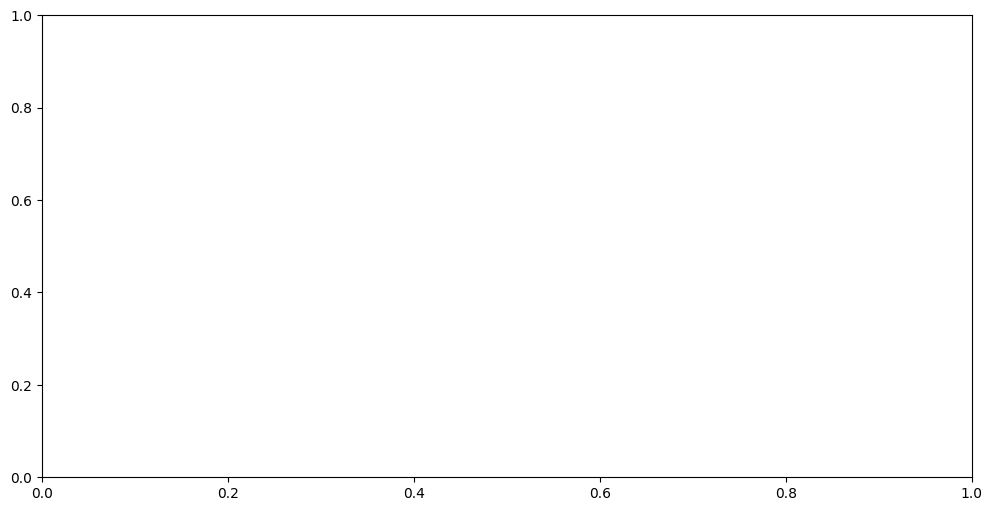

In [31]:


def convergence_analysis_galman_rubin(name, traindata, testdata, problem_type, network_structure, numSamples, folder):
    results_folder = folder + name
    bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)
    df = pd.DataFrame()

    num_runs = 5
    pw_prun_lists = {'Initial Posterior': [], '0.25 Pruned': [], '0.25 Resampled': [],
                     '0.50 Pruned': [], '0.50 Resampled': [], '0.75 Pruned': [], '0.75 Resampled': []}

    for prun_method in ["stn"]:
        count_0 = count_025 = count_resample_025 = count_050 = count_resample_050 = count_075 = count_resample_075 = 0

        for p_w in os.listdir(results_folder):
            path = os.path.join(results_folder, p_w)
            if not p_w.endswith('result.txt') and p_w.endswith(".txt"):
                pos_weights = np.loadtxt(path)
                key = None
                if p_w.startswith("pos_w_") and count_0 < num_runs:
                    key = 'Initial Posterior'
                    count_0 += 1
                elif p_w.startswith(f"pos_w_{prun_method}_0.25") and count_025 < num_runs:
                    key = '0.25 Pruned'
                    count_025 += 1
                elif p_w.startswith(f"pos_r_{prun_method}_0.25") and count_resample_025 < num_runs:
                    key = '0.25 Resampled'
                    count_resample_025 += 1
                elif p_w.startswith(f"pos_w_{prun_method}_0.50") and count_050 < num_runs:
                    key = '0.50 Pruned'
                    count_050 += 1
                elif p_w.startswith(f"pos_r_{prun_method}_0.50") and count_resample_050 < num_runs:
                    key = '0.50 Resampled'
                    count_resample_050 += 1
                elif p_w.startswith(f"pos_w_{prun_method}_0.75") and count_075 < num_runs:
                    key = '0.75 Pruned'
                    count_075 += 1
                elif p_w.startswith(f"pos_r_{prun_method}_0.75") and count_resample_075 < num_runs:
                    key = '0.75 Resampled'
                    count_resample_075 += 1

                if key:
                    pw_prun_lists[key].append(pos_weights)

        # Plotting the distribution using KDE
        fig, ax = plt.subplots(figsize=(12, 6))
        for key, values in pw_prun_lists.items():
            sns.kdeplot(np.hstack(values), label=key, ax=ax)

        plt.legend(title='Pruning/Resampling Methods')
        plt.xlabel('Parameter Values')
        plt.ylabel('Density')
        plt.title('Parameter Distributions across Pruning and Resampling Methods')
        plt.savefig(f"{folder}\\{name}_convergence_distribution.svg")
        plt.show()

# Use the function for your datasets
folder = "result_retrain4\\"
for dataset in os.listdir(folder):
    if dataset == "Lazer":
        traindata, testdata, problem_type, network_structure, numSamples = get_dataset_details(dataset)
        convergence_analysis_galman_rubin(dataset, traindata, testdata, problem_type, network_structure, numSamples, folder)


exp_310
exp_325
              Bulk     Porosity  Resistivity
count  3852.000000  3852.000000  3852.000000
mean      1.994231     0.436058     2.470501
std       0.229167     0.133041     3.510888
min       1.017700     0.123800     0.331800
25%       1.925675     0.355500     0.746400
50%       2.032750     0.414800     1.017500
75%       2.131725     0.475650     2.208300
max       2.536500     1.004800    28.860000
------------------------------
[4. 4. 3. ... 2. 4. 4.]
------------------------------
[[0.12603748 0.10352372 0.21266641 0.20638267 0.23770455 0.11368517]
 [0.1468239  0.11611403 0.12354772 0.23036211 0.26405445 0.11909778]
 [0.1269607  0.10028531 0.22520308 0.226297   0.21874123 0.10251268]
 ...
 [0.12863281 0.10473192 0.25247775 0.25089359 0.14959827 0.11366565]
 [0.13946802 0.11221381 0.15182796 0.21420985 0.2627664  0.11951396]
 [0.14673132 0.11761462 0.12809137 0.2082424  0.27491608 0.1244042 ]]
------------------------------
1  is our exp run


C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorat

------------------------------
[4. 4. 2. ... 2. 4. 4.]
------------------------------
[[0.12159192 0.11938606 0.18285392 0.14789152 0.30886894 0.11940765]
 [0.12933865 0.12699186 0.15507642 0.13077654 0.33080132 0.12701522]
 [0.09349029 0.09179431 0.24913162 0.22600078 0.24777217 0.09181083]
 ...
 [0.09189574 0.09022901 0.2451263  0.23897742 0.24352661 0.09024493]
 [0.12865815 0.12632387 0.15650213 0.13573379 0.32643511 0.12634694]
 [0.13187173 0.12947905 0.14231917 0.13409202 0.33273524 0.12950279]]
------------------------------
2  is our exp run


C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

------------------------------
[4. 4. 5. ... 2. 4. 4.]
------------------------------
[[0.13634868 0.14113705 0.13594159 0.13731128 0.29712418 0.15213723]
 [0.13241015 0.13746087 0.13231004 0.1349543  0.31152303 0.15134161]
 [0.13925943 0.14293229 0.17204959 0.19136175 0.16006868 0.19432826]
 ...
 [0.13922609 0.14138479 0.19279231 0.18881182 0.14576048 0.1920245 ]
 [0.13334621 0.13829793 0.13296903 0.13438957 0.31241788 0.14857938]
 [0.13173057 0.13674663 0.13128366 0.13228215 0.32320156 0.14475544]]
------------------------------
3  is our exp run


C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])


------------------------------
[4. 4. 3. ... 3. 4. 4.]
------------------------------
[[0.13564398 0.12460586 0.13401968 0.20543625 0.26796265 0.13233158]
 [0.13342189 0.12189546 0.12707155 0.2009688  0.28812251 0.12851978]
 [0.15033756 0.14099038 0.16084305 0.23245044 0.166611   0.14876758]
 ...
 [0.14645098 0.13787424 0.1879746  0.22730875 0.15215359 0.14823784]
 [0.13369889 0.12226115 0.12810321 0.20157148 0.2852576  0.12910767]
 [0.13240162 0.12059072 0.12535724 0.19881755 0.29557614 0.12725673]]
------------------------------
4  is our exp run


C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])


------------------------------
[4. 4. 4. ... 4. 4. 4.]
------------------------------
[[0.11741179 0.1173478  0.21251112 0.11848329 0.31689805 0.11734795]
 [0.1238898  0.12367596 0.1698982  0.12487263 0.33398712 0.12367629]
 [0.11947676 0.11907183 0.20060162 0.120224   0.32155377 0.11907201]
 ...
 [0.11663316 0.11653634 0.21792331 0.11766399 0.31470671 0.11653648]
 [0.11929726 0.11920805 0.20000327 0.12036154 0.32192164 0.11920824]
 [0.12039236 0.12029586 0.19269657 0.12145987 0.32485926 0.12029608]]
------------------------------
5  is our exp run


C:\ProgramData\Anaconda3\envs\bayesprun\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])
C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1

---------------------------------------
stn
mse_075 =  5
mse_resampled_075 =  5
---------------------------------------
Lazer
ROC_plots
trace_plots


C:\Users\deora\AppData\Local\Temp\ipykernel_54528\2665158930.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.75, 1])


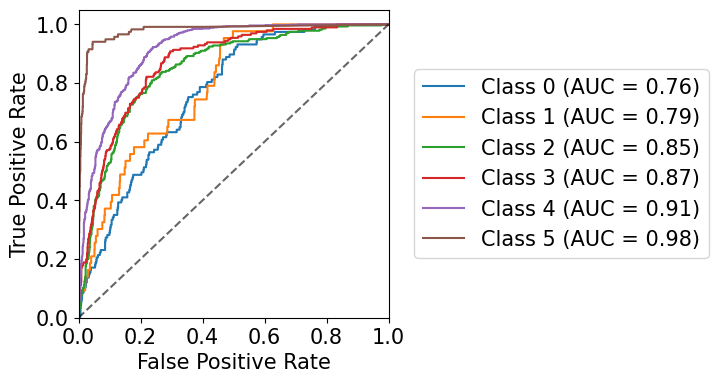

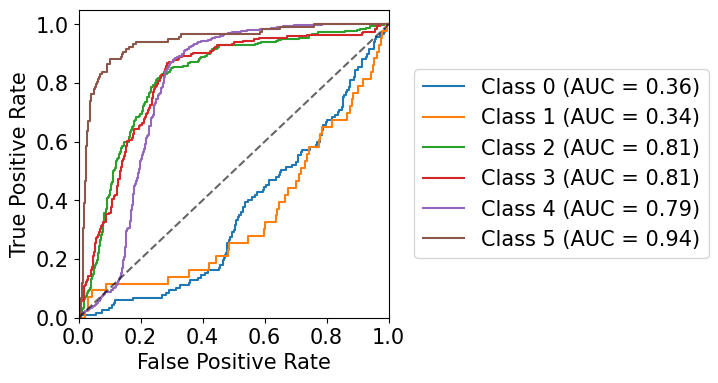

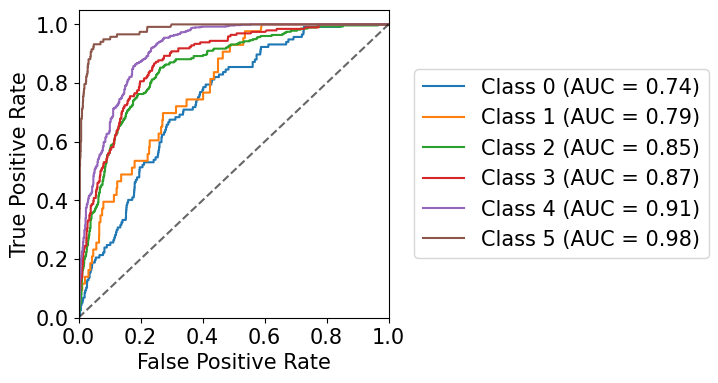

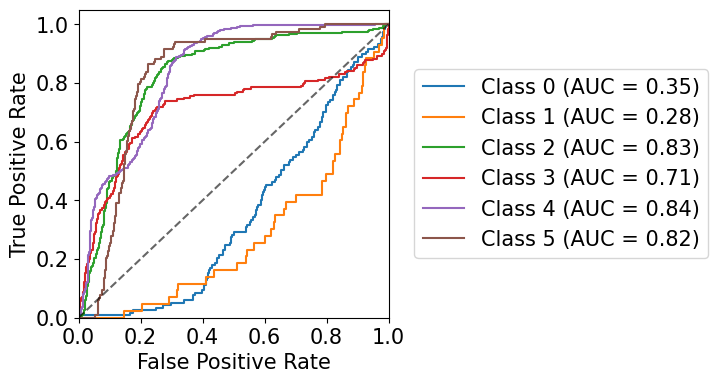

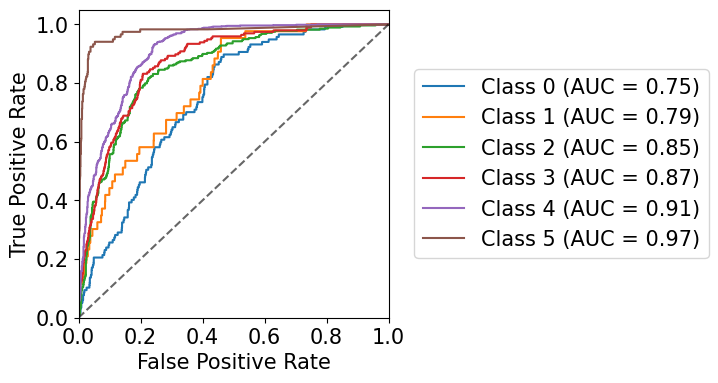

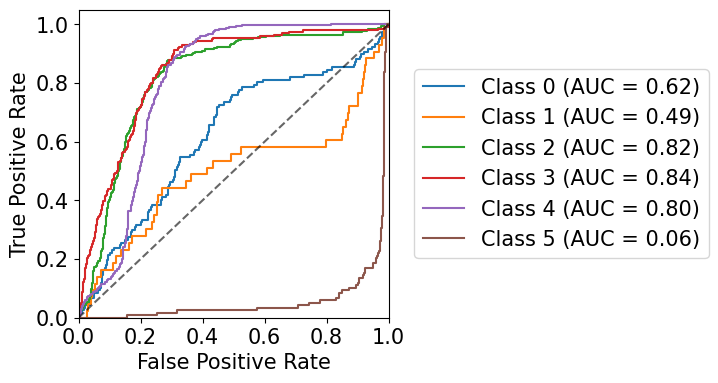

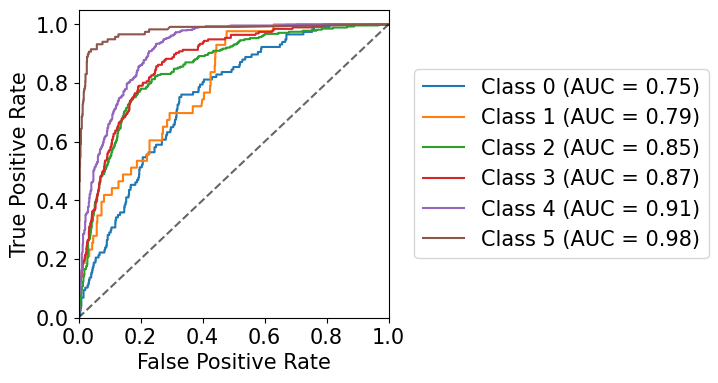

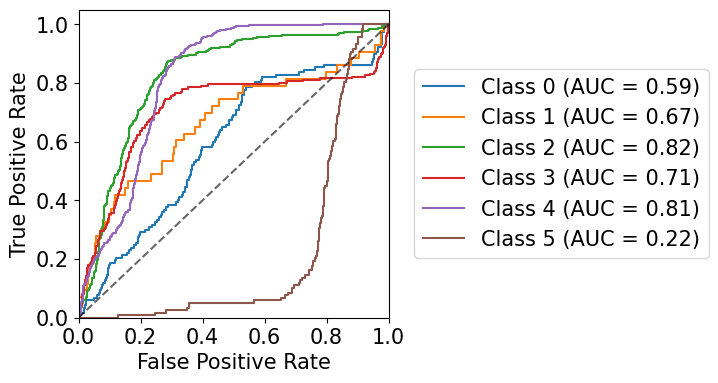

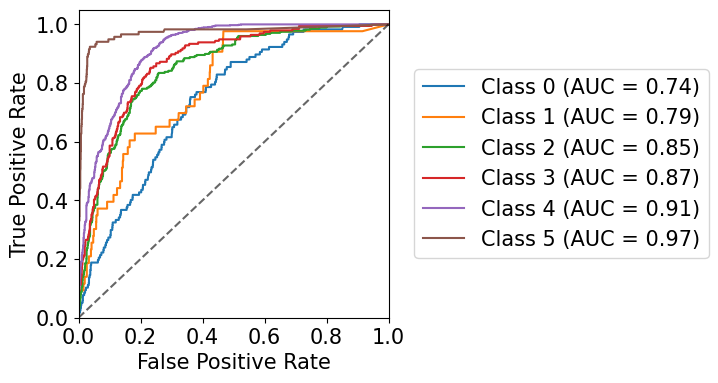

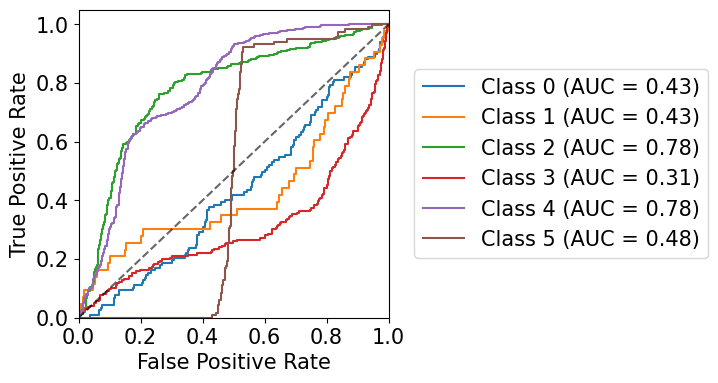

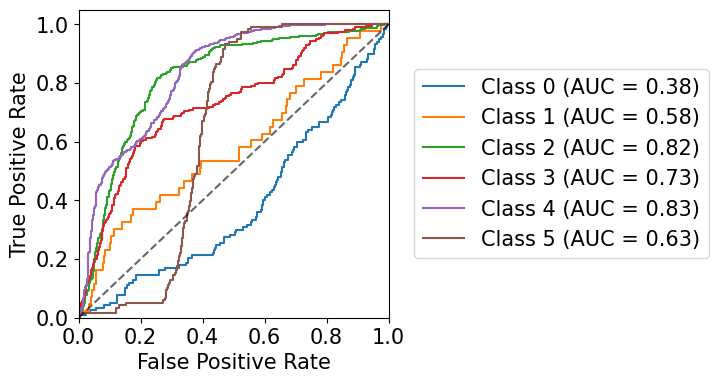

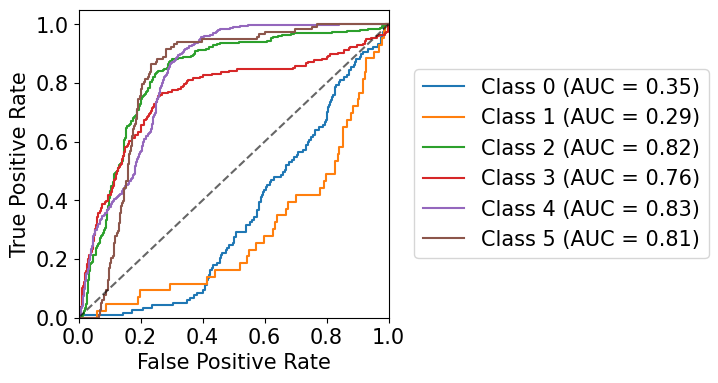

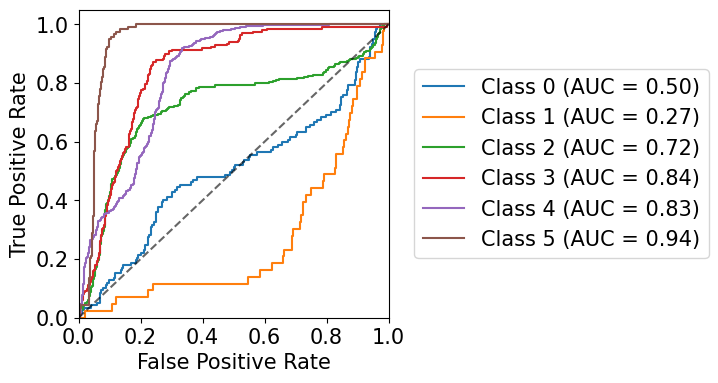

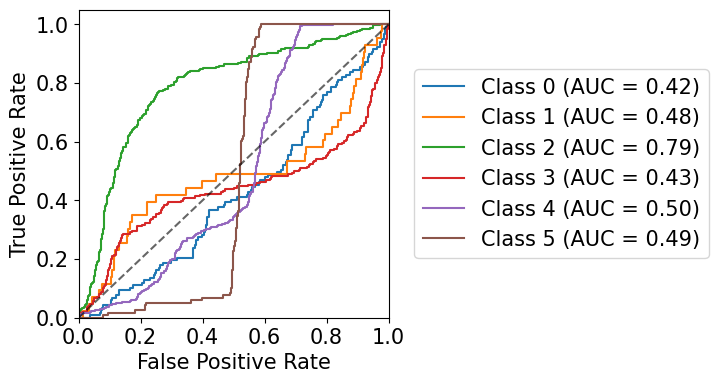

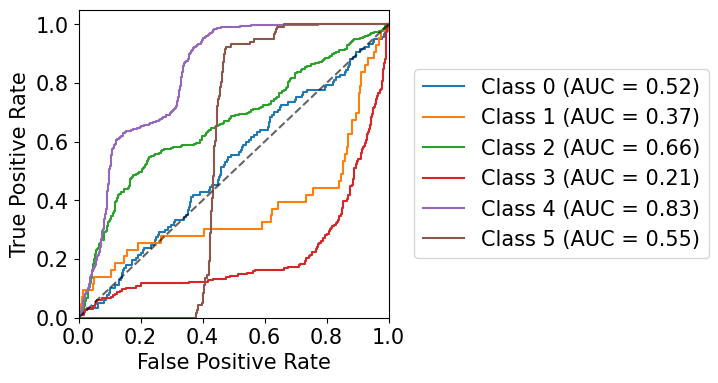

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from scipy import stats

def plot_multiclass_roc(y_true, y_pred_prob, classes, name="ROC Curve"):
    """
    Plots ROC curve for multiclass classification.

    Args:
        y_true (array): True labels.
        y_pred_prob (array): Predicted probabilities.
        classes (list): List of class names.
        title (str): Title of the plot.
    """
    # Binarize the labels for multiclass ROC
    y_true_binarized = label_binarize(y_true, classes=np.arange(len(classes)))
    
    # Initialize a plot
    plt.figure(figsize=(4, 4))  # Increase the figure size for better visualization
    
    # Loop through each class to calculate ROC and AUC
    for i, class_name in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")
    
    # Plot a diagonal reference line
    size = 15
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=size)
    plt.ylabel('True Positive Rate', fontsize=size)
    plt.xticks(fontsize=size)
    plt.yticks(fontsize=size)
    
    # Place the legend outside the plot
    plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), fontsize=size)
    
    # Adjust layout to accommodate the legend
    plt.tight_layout(rect=[0, 0, 0.75, 1])
    
    # Save and display the plot
    plt.savefig(f"{name}.svg", bbox_inches="tight")


def multiclass_analysis(name,traindata, testdata, problem_type, network_structure,numSamples, folder):
    results_folder = folder + name 
    
    count = 1
    #pos_weights = np.array(pos_weights)
    
   
    bnn_model = Network(network_structure, traindata, testdata, 0.01, problem_type)



    df = pd.DataFrame()

    num_runs = 5
    num_trace = 1
    pw_prun_list = []
    
    for prun_method in ["stn"]:#,"spn","rnd"]:
        """
        mse_025 = []
        mse_resampled_025 = []
        mse_050 = []
        mse_resampled_050 = []
        """
        mse_075 = []
        count_075 = 0
        count_trace_075 = 0
        mse_resampled_075 = []
        count_resample_075 = 0
        count_trace_resampled_075 = 0
    
        for p_w in os.listdir(results_folder):
    
            
            
            #print (p_w)
            '''
            if p_w.startswith(f"pos_w_{prun_method}_0.25") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_025.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                #mse_025.append(1)
            elif p_w.startswith(f"pos_r_{prun_method}_0.25") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_resampled_025.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))
                #mse_resampled_025.append(1)
                
            if p_w.startswith(f"pos_w_{prun_method}_0.50") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_050.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                #mse_050.append(1)
                
            elif p_w.startswith(f"pos_r_{prun_method}_0.50") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt"):
                # Prints only text file present in My Folder
                mse_resampled_050.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))  
                #mse_resampled_050.append(1)
            ''' 
            
            if p_w.startswith(f"pos_w_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_075 < num_runs:
                # Prints only text file present in My Folder
                #mse_075.append(load_evaluate_model(bnn_model,testdata, p_w , results_folder, problem_type))
                count_075 += 1
                pos_w = np.loadtxt(results_folder+"\\"+p_w)
                fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, pos_w.mean(axis=0))
                n_classes = prob_spn.shape[1]
                class_names = [f"{i}" for i in range(n_classes)]
                plot_multiclass_roc(testdata[:,-1], prob_spn, classes=class_names, name=f"{folder}\\ROC_plots\\{name}_roc_pos_w_bnn_{count_075}")
                
                mse_075.append(1)
              
            if p_w.startswith(f"pos_r_{prun_method}_0.75") and not(p_w.endswith('result.txt')) and p_w.endswith(".txt") and count_resample_075 < num_runs:
                # Prints only text file present in My Folder
                #mse_resampled_075.append(load_evaluate_model(bnn_model,testdata, p_w, results_folder, problem_type))
                count_resample_075 += 1
                pos_r = np.loadtxt(results_folder+"\\"+p_w)

                fx_spn, prob_spn = bnn_model.evaluate_proposal(testdata, pos_r.mean(axis=0))
                print("------------------------------")
                print(fx_spn)
                print("------------------------------")
                print(prob_spn)
                print("------------------------------")
                n_classes = prob_spn.shape[1]
                # Define class names (optional)
                class_names = [f"{i}" for i in range(n_classes)]
                # Plot ROC curve for test data

                ## SCIPY model results for comparison
                y_score = scipy_models(traindata, testdata, network_structure ,class_names, count_resample_075, name)
                plot_multiclass_roc(testdata[:,-1], y_score, classes=class_names, name=f"{folder}\\ROC_plots\\{name}_roc_rfc_{count_resample_075}")
                plot_multiclass_roc(testdata[:,-1], prob_spn, classes=class_names, name=f"{folder}\\ROC_plots\\{name}_roc_pos_r_bnn_{count_resample_075}")
                mse_resampled_075.append(1)
               
            
            #print(count)
        count += 1 
        
        #print(count)
        print("---------------------------------------")
        print(prun_method)
        '''
        print("mse_025 = " ,len(mse_025[:20]))
        print("mse_resampled_025 = " ,len(mse_resampled_025[:20])) 
        print("mse_050 = " ,len(mse_050[:20]))  
        print("mse_resampled_050 = " ,len(mse_resampled_050[:20]))  
        '''
        print("mse_075 = " ,len(mse_075))  
        print("mse_resampled_075 = " ,len(mse_resampled_075))  
        print("---------------------------------------")




def scipy_models(traindata, testdata, topology ,class_names,run_num,dataset):

    print(run_num, ' is our exp run')

    tree_depth = 10
 
    name = ""
    
    type_model = 3
    if type_model ==2:
        model = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=2000, solver='adam',  learning_rate_init=0.001, activation = 'logistic' )  
        name = "fnn"+str(run_num)+".png"
    elif type_model ==3:
        model = RandomForestClassifier(n_estimators=50, max_depth=tree_depth, random_state=run_num)
        name = "rfc"+str(run_num)+".png"
    elif type_model ==4:
        name = "knn"+str(run_num)+".png"
        model = KNeighborsClassifier(n_neighbors = 7)


    model.fit(traindata[:,:topology[0]], traindata[:,topology[0]:])

    # Make predictions using the testing set
    y_pred_test = model.predict(testdata[:,:topology[0]])
    #y_pred_train = model.predict(x_train)


    y_score = model.predict_proba(testdata[:,:topology[0]])
    return y_score
    #plot_multiclass_roc(testdata[:,-1], y_score, classes=class_names, title=f"roc RFC {dataset}")
    #input()


    
folder = "result_retrain4\\"
for dataset in os.listdir(folder):
    
 
    if dataset in [""]  :
        print(dataset)
    else:
        
        if dataset.find(".") == -1:
            print(dataset)
            #if not (dataset == "Lazer" or dataset == 'abalone') :
            if ( dataset == "exp_325" ) :
                traindata, testdata, problem_type, network_structure, numSamples = get_dataset_details(dataset)
                
                #convergence_analysis(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )
                multiclass_analysis(dataset,traindata, testdata, problem_type, network_structure,numSamples, folder )

# Lazer

### Bayesian linear regression

In [34]:
traindata = np.loadtxt("data/Lazer/train.txt")
testdata = np.loadtxt("data/Lazer/test.txt") 
topology = [4, 1]

In [25]:
cwd+ "\\results1"

'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\results1'

In [1]:
import os
from os import listdir
from os.path import isfile, join

cwd = os.getcwd()
os.chdir(cwd+ "\\result1\\Lazer")
cwd = os.getcwd()
onlyfiles = [os.path.join(cwd, f) for f in os.listdir(cwd) if os.path.isfile(os.path.join(cwd, f))]
print(onlyfiles) 

['D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_0.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_0result.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_1.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_10.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_10result.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_11.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_11result.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_12.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos_w_12result.txt', 'D:\\Dropbox\\RatneelPhd\\Experiments\\BayesianPrunning\\code_data\\result1\\Lazer\\pos

In [35]:
pos_run1_bnn = np.loadtxt('result1/Lazer/pos_w_0.txt')
pos_run2_bnn = np.loadtxt('result1/Lazer/pos_w_1.txt')  
pos_run3_bnn = np.loadtxt('result1/Lazer/pos_w_2.txt')  
pos_run4_bnn = np.loadtxt('result1/Lazer/pos_w_3.txt')  
pos_run5_bnn = np.loadtxt('result1/Lazer/pos_w_4.txt') 

data_bnn = np.array([pos_run1_bnn, pos_run2_bnn, pos_run3_bnn, pos_run4_bnn, pos_run5_bnn])


In [36]:
print('gelman rubin - bnn')
gelman_rubin(data_bnn)

gelman rubin - bnn
[ 202.84820512    9.88351213  180.96401946  142.76687884  155.84191687
   54.2426983    52.48863143  125.78058451  294.36692919   40.61676246
    6.98174487  110.2793607   580.55396449  209.9825906   353.11249357
  508.52040016  835.36075406  284.8155292    82.84667201  134.22800105
  656.52722395 1573.30370005 1005.19859978  693.5959547   715.15761278
   53.48412663    7.31180197   51.96205928   97.3462265     8.04546855
   75.0949119 ]  Rhat


array([ 202.84820512,    9.88351213,  180.96401946,  142.76687884,
        155.84191687,   54.2426983 ,   52.48863143,  125.78058451,
        294.36692919,   40.61676246,    6.98174487,  110.2793607 ,
        580.55396449,  209.9825906 ,  353.11249357,  508.52040016,
        835.36075406,  284.8155292 ,   82.84667201,  134.22800105,
        656.52722395, 1573.30370005, 1005.19859978,  693.5959547 ,
        715.15761278,   53.48412663,    7.31180197,   51.96205928,
         97.3462265 ,    8.04546855,   75.0949119 ])

In [37]:
bnn_model_lazer = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
mse_bnn = np.empty(5)

for i in range(5):
    temp_fx, temp_prob = bnn_model_lazer.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    mse_bnn[i] = squared_error(temp_fx, testdata[:, -1])
    
print('bnn mse: ', round(mse_bnn.mean(), 10))



bnn mse:  0.0005794618


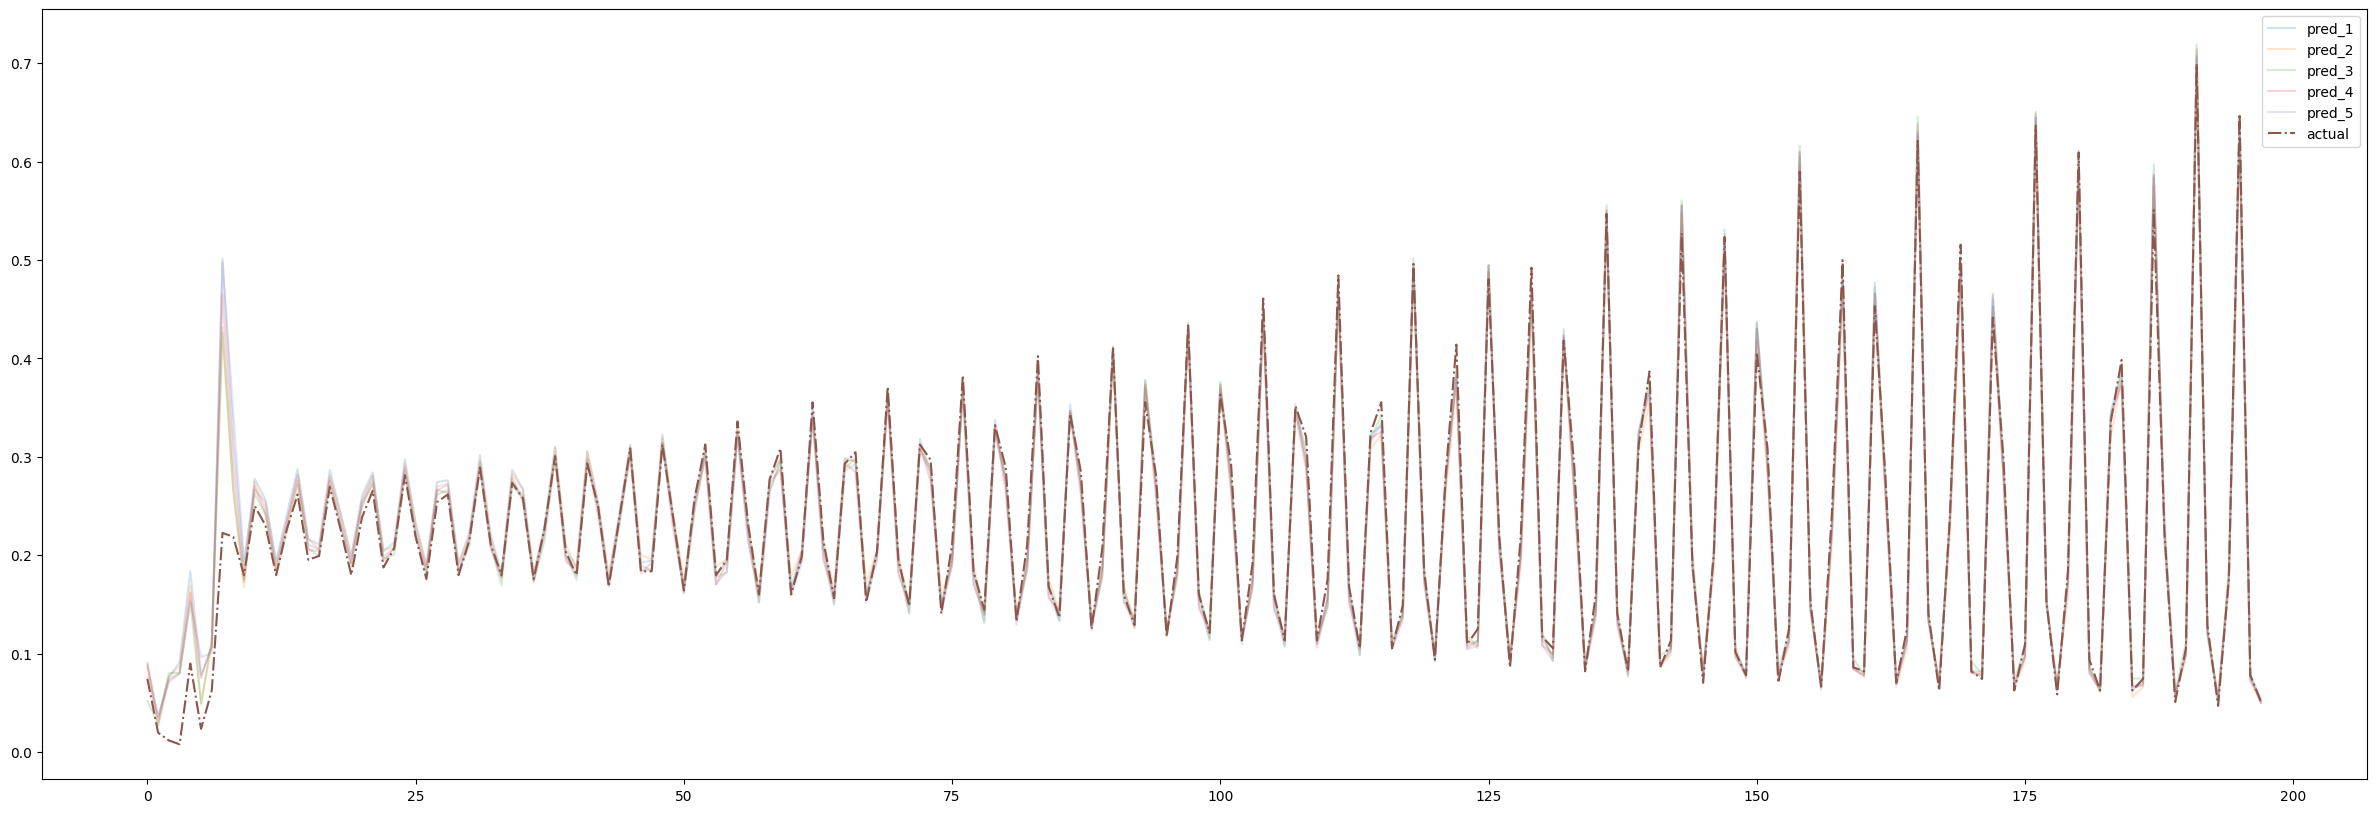

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(30,10))
for i in range(5):
    temp_fx, temp_prob = bnn_model_lazer.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    plt.plot(temp_fx, "-", label = 'pred_'+ str(i+1), alpha=0.2)
    
plt.plot(testdata[:, -1], '-.', label = 'actual')
plt.legend()
plt.show()
plt.clf()




# Sunspot

In [39]:
traindata = np.loadtxt("data/Sunspot/train.txt")
testdata = np.loadtxt("data/Sunspot/test.txt") 
topology = [4, 1]

In [43]:
# load the trained weights
pos_run1 = np.loadtxt('result1/Sunspot/pos_w_0.txt')
pos_run2 = np.loadtxt('result1/Sunspot/pos_w_1.txt')  
pos_run3 = np.loadtxt('result1/Sunspot/pos_w_2.txt')  
pos_run4 = np.loadtxt('result1/Sunspot/pos_w_3.txt')  
pos_run5 = np.loadtxt('result1/Sunspot/pos_w_4.txt') 

data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

print('gelman rubin - linreg')
gelman_rubin(data)

gelman rubin - linreg
[ 176.37069339   53.51957729   77.3739326    44.01731406    3.724235
  180.28139842  290.02346357  297.58194636   62.19164478   54.0622898
  133.62997983  145.02563965  114.80597112  194.47022937  119.48883618
  230.0130604   795.39401345  212.79628249  293.27310981  503.24043269
  300.50192832  601.44704526  327.47362775  577.0540339  1555.31657563
  105.57901657   63.25475519   51.96930643  310.15116623  307.04876195
   74.13906354]  Rhat


array([ 176.37069339,   53.51957729,   77.3739326 ,   44.01731406,
          3.724235  ,  180.28139842,  290.02346357,  297.58194636,
         62.19164478,   54.0622898 ,  133.62997983,  145.02563965,
        114.80597112,  194.47022937,  119.48883618,  230.0130604 ,
        795.39401345,  212.79628249,  293.27310981,  503.24043269,
        300.50192832,  601.44704526,  327.47362775,  577.0540339 ,
       1555.31657563,  105.57901657,   63.25475519,   51.96930643,
        310.15116623,  307.04876195,   74.13906354])

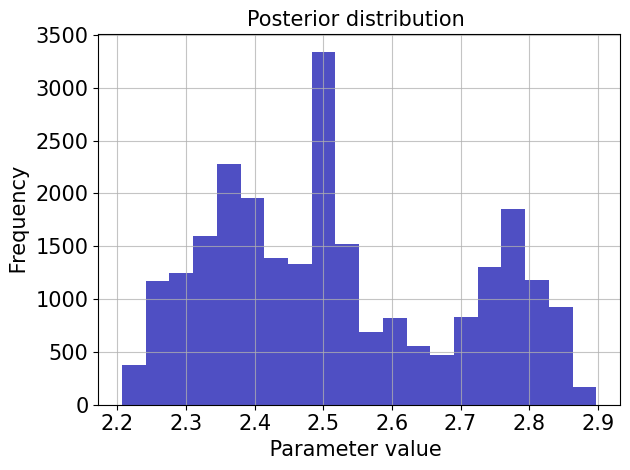

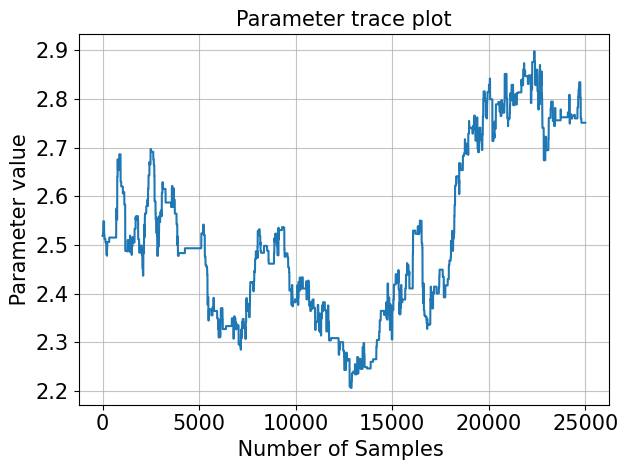

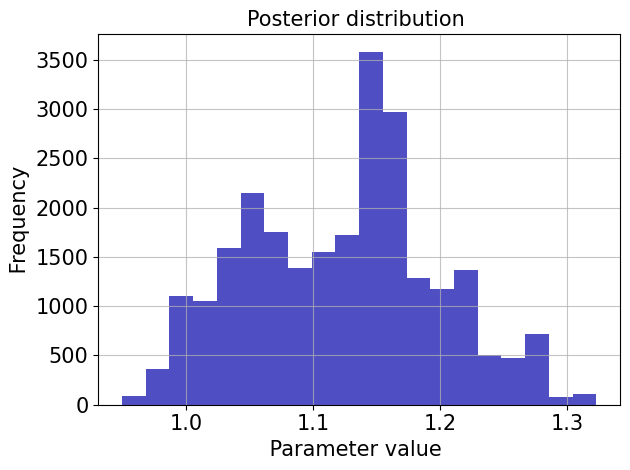

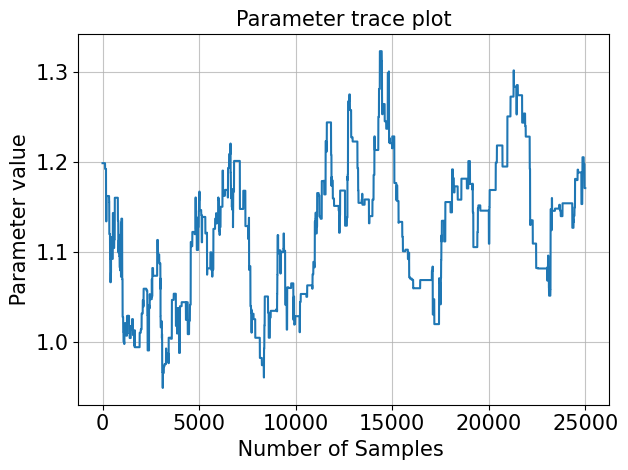

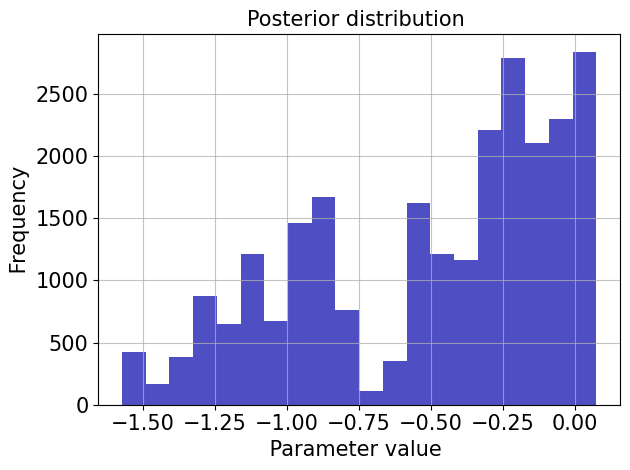

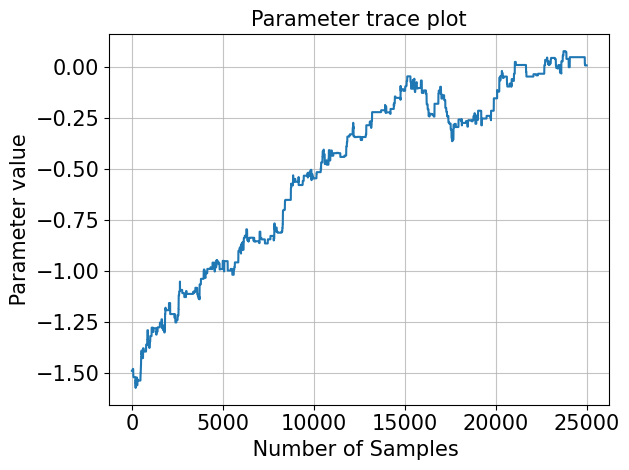

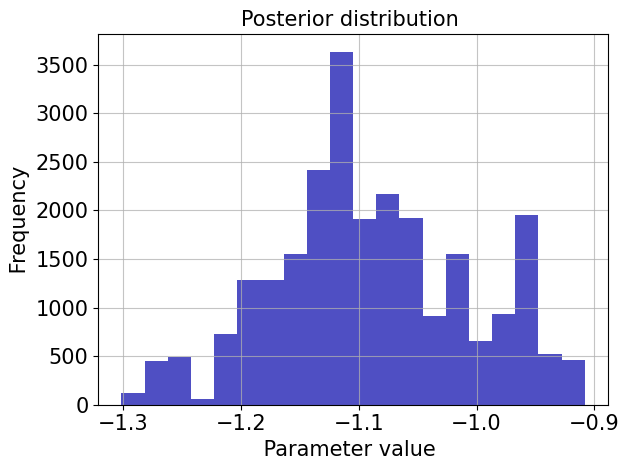

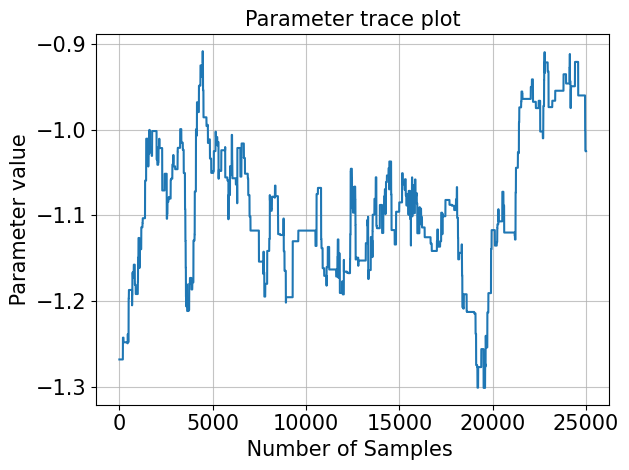

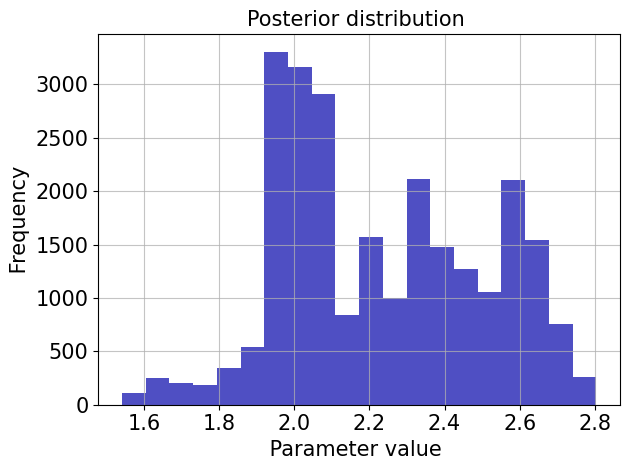

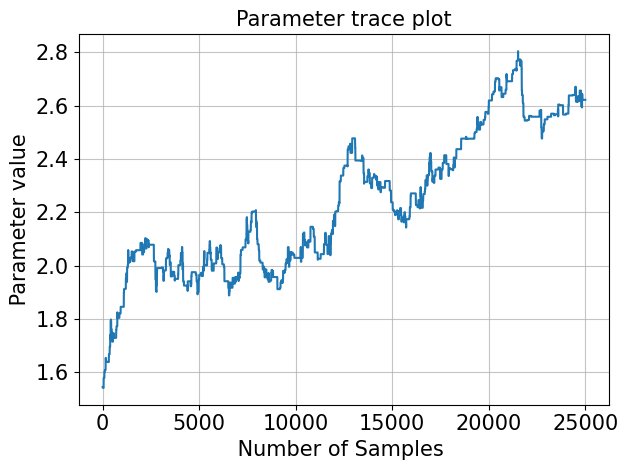

In [44]:
for w in data:
        histogram_trace(w[:, 2])

In [23]:
histogram_trace(data[2, :, 2], "sunspot_lin_bad")

<Figure size 432x288 with 0 Axes>

In [6]:
print(np.mean(data[2, :, 2]))
print(np.std(data[2, :, 2]))
print(np.mean(data[0, :, 4]))
print(np.std(data[0, :, 4]))

-1.3767384946129928
0.8993735456287834
-2.4554170349234616
0.022755139659311065


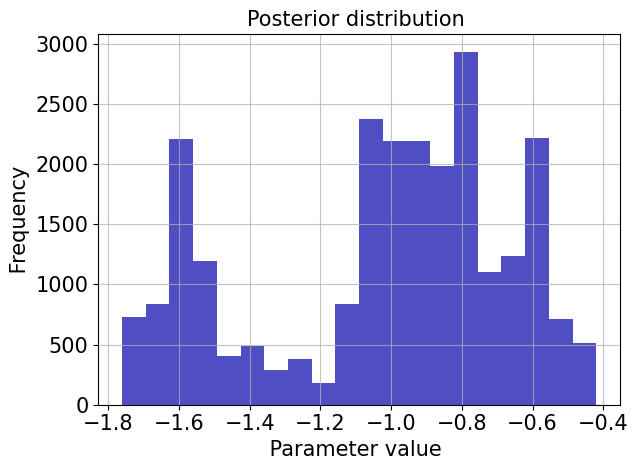

In [45]:
 size = 15

pos_points = data[0, :, 4]

plt.tick_params(labelsize=size)
params = {'legend.fontsize': size, 'legend.handlelength': 2}
plt.rcParams.update(params)
plt.grid(alpha=0.75)

plt.hist(pos_points,  bins = 20, color='#0504aa', alpha=0.7)   
plt.title("Posterior distribution ", fontsize = size)
plt.xlabel(' Parameter value  ', fontsize = size)
plt.ylabel(' Frequency ', fontsize = size) 
plt.tight_layout()




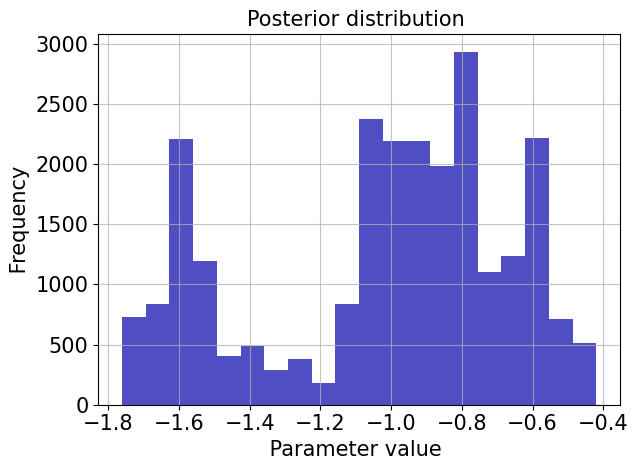

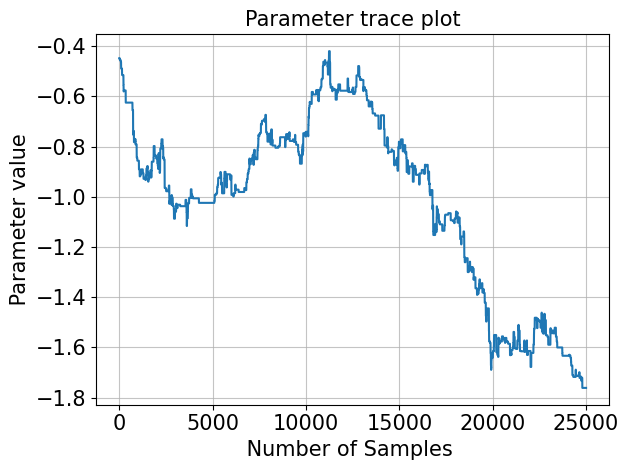

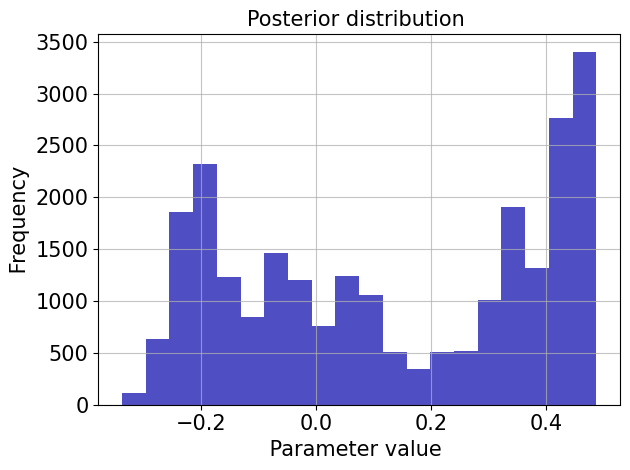

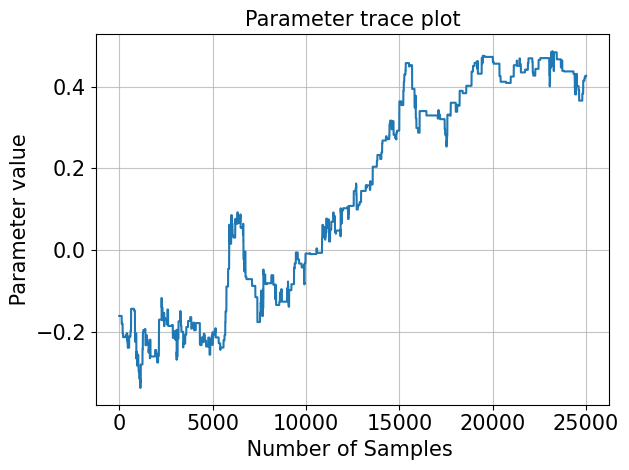

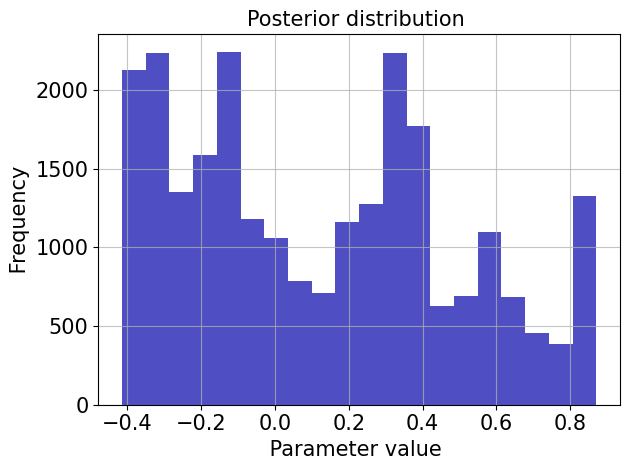

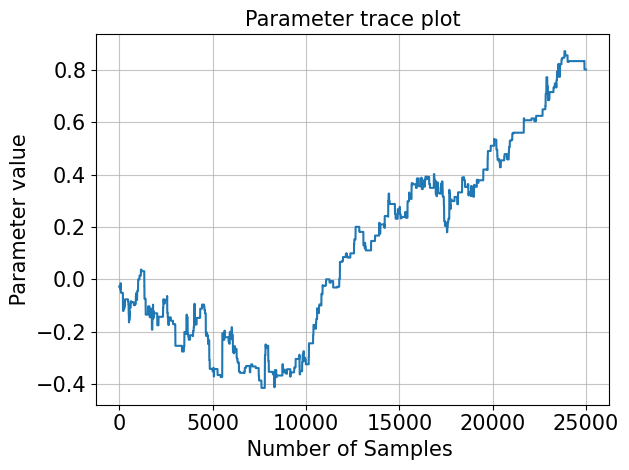

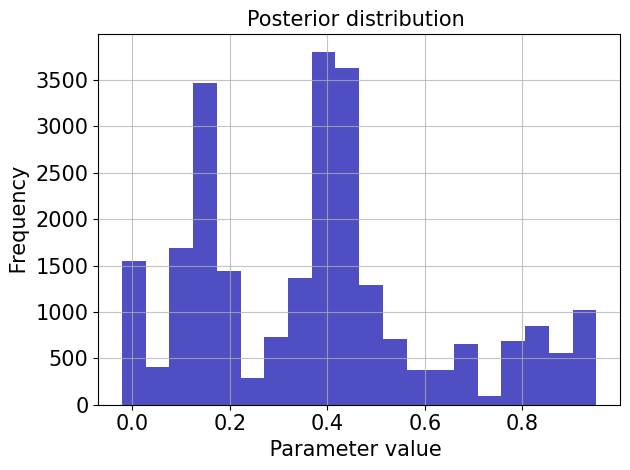

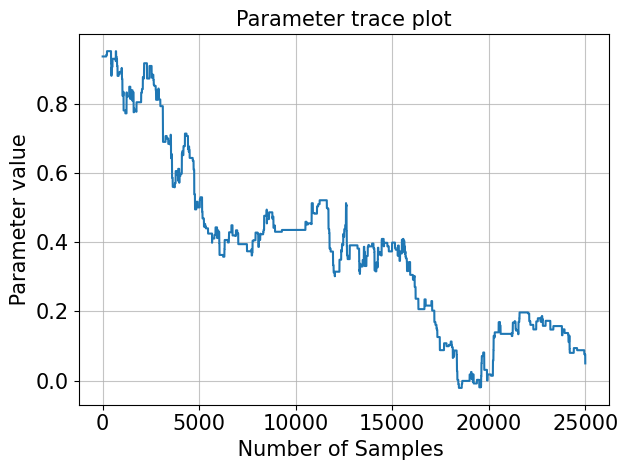

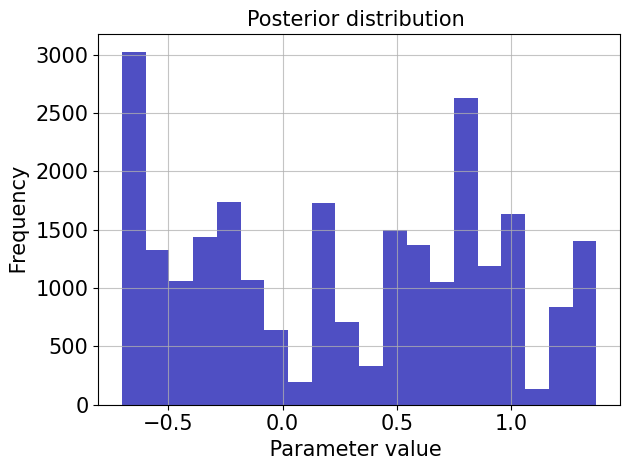

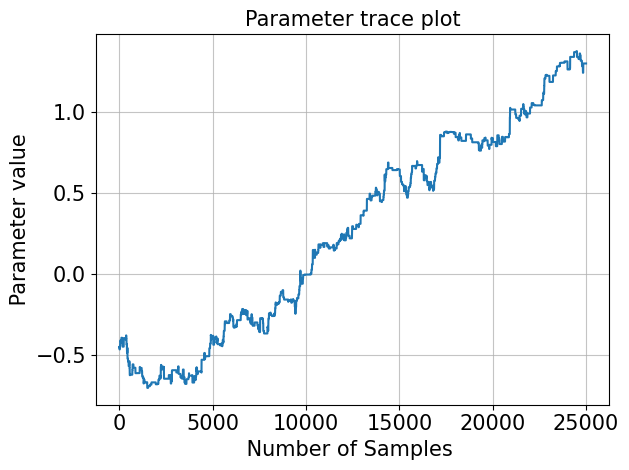

In [46]:
for w in data:
        histogram_trace(w[:, 4])
        

In [10]:
lin_model_sunspot = lin_model(0, traindata, testdata, topology[0], 0.1, False)
mse = np.empty(5)

for i in range(5):
   mse[i] = np.sqrt(squared_error(lin_model_sunspot.evaluate_proposal(testdata, data[i].mean(axis=0)), testdata[:, -1]))
   

print('linreg mse: ', round(mse.mean(), 10))

linreg mse:  0.0358221971


In [11]:
lin_model_sunspot = lin_model(0, traindata, testdata, topology[0], 0.1, False)
mse = np.empty(5)

for i in range(5):
   mse[i] = np.sqrt(squared_error(lin_model_sunspot.evaluate_proposal(traindata, data[i].mean(axis=0)), traindata[:, -1]))
   

print('linreg mse: ', round(mse.mean(), 10))

linreg mse:  0.0297237145


In [12]:
pos_run1_bnn = np.loadtxt('result/Sunspot/pos_w_0.txt')
pos_run2_bnn = np.loadtxt('result/Sunspot/pos_w_1.txt')  
pos_run3_bnn = np.loadtxt('result/Sunspot/pos_w_2.txt')  
pos_run4_bnn = np.loadtxt('result/Sunspot/pos_w_3.txt')  
pos_run5_bnn = np.loadtxt('result/Sunspot/pos_w_4.txt') 

data_bnn = np.array([pos_run1_bnn, pos_run2_bnn, pos_run3_bnn, pos_run4_bnn, pos_run5_bnn])

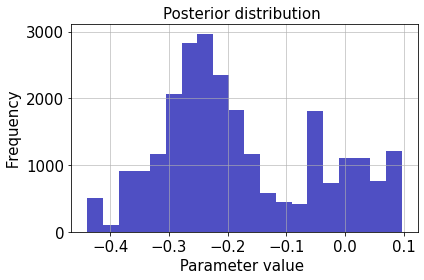

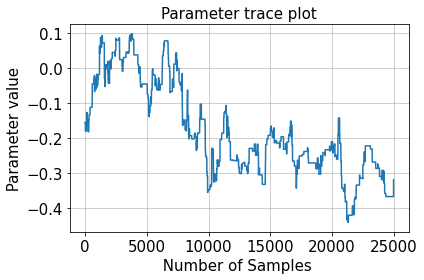

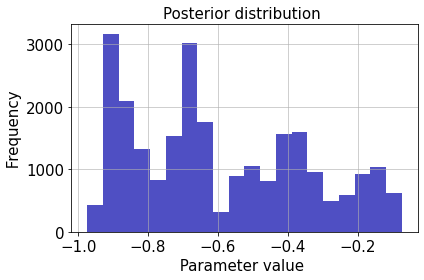

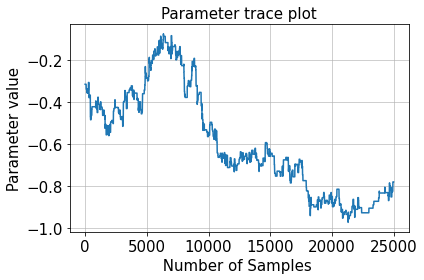

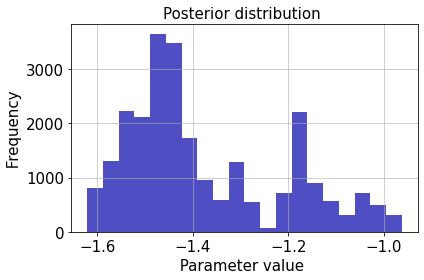

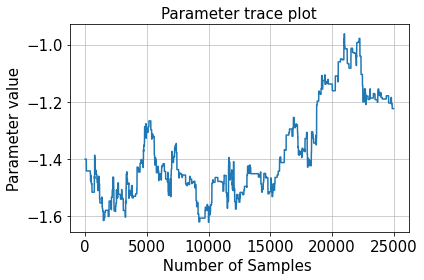

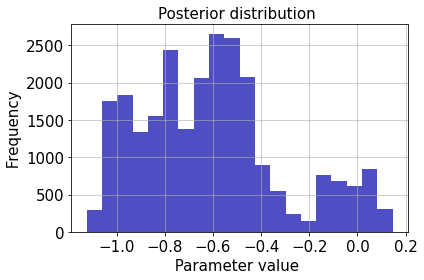

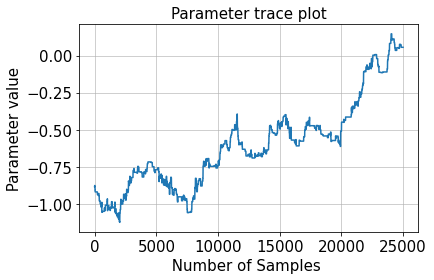

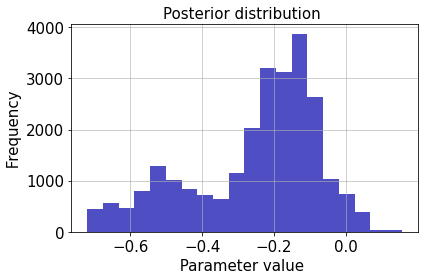

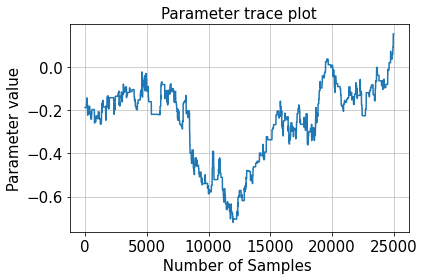

In [21]:
for i in range(5):
    histogram_trace(data_bnn[i, :, 4])

In [26]:
print(np.mean(data_bnn[3, :, 23]))
print(np.std(data_bnn[3, :, 23]))
print(np.mean(data_bnn[4, :, 4]))
print(np.std(data_bnn[4, :, 4]))


1.241426651494975
0.3598620801671214
-0.25166358516278126
0.18055032717956981


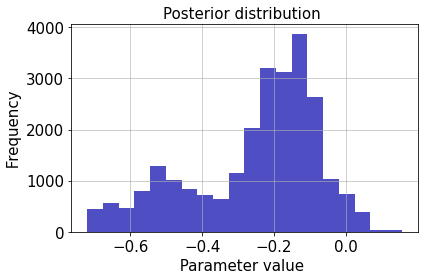

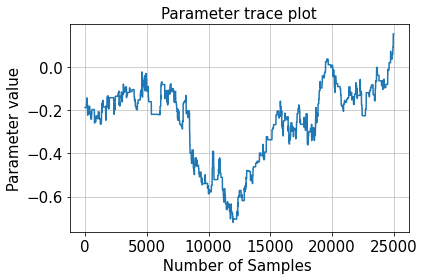

In [22]:
# for w in data_bnn:
#     for i in range(31):
#         histogram_trace(w[:, i])
histogram_trace(data_bnn[4, :, 4])
    


In [25]:
histogram_trace(data_bnn[4, :, 4], "sunspot_nn_good")

<Figure size 432x288 with 0 Axes>

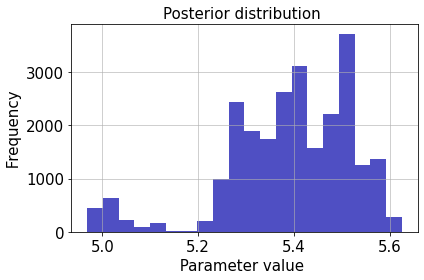

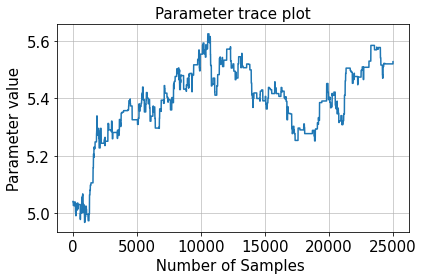

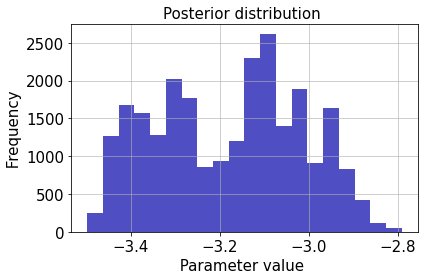

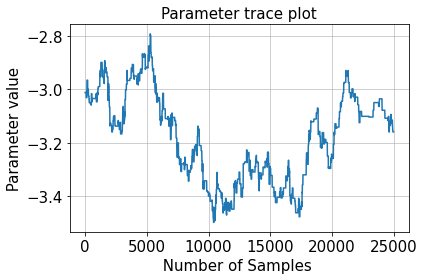

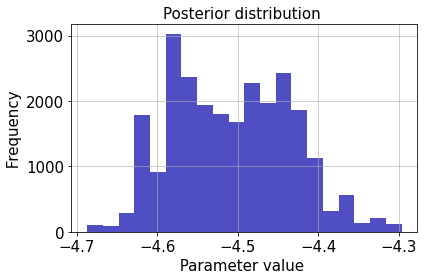

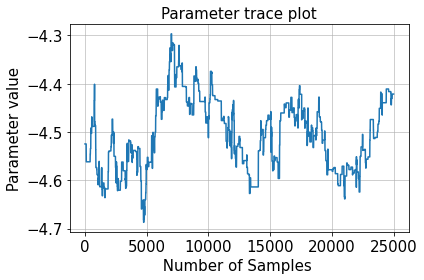

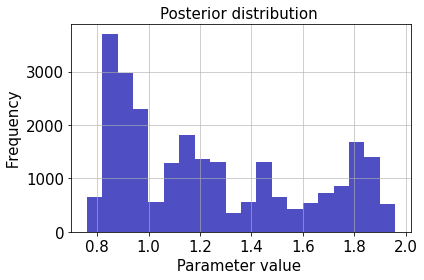

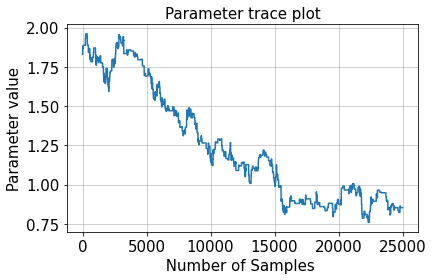

In [69]:
for i in range(4):
    histogram_trace(data_bnn[i, :, 23])

In [18]:
print('gelman rubin - bnn')
gelman_rubin(data_bnn)

gelman rubin - bnn
[167.83878437  38.57523849  63.92776901 132.21830682   8.37783528
 165.74077152  22.19472072  20.69348706  68.86812541  40.97752025
 145.92593111  96.33558519  75.96949095 635.70218139 115.16437684
 152.33541696 287.04597097 215.7746704  135.43100796 156.17664544
 161.04780493 820.74307722  31.77084623 855.68533154 308.59570643
 259.49895969 145.47991658 242.95720984 332.94998431 393.32119139
 138.62425411]  Rhat


array([167.83878437,  38.57523849,  63.92776901, 132.21830682,
         8.37783528, 165.74077152,  22.19472072,  20.69348706,
        68.86812541,  40.97752025, 145.92593111,  96.33558519,
        75.96949095, 635.70218139, 115.16437684, 152.33541696,
       287.04597097, 215.7746704 , 135.43100796, 156.17664544,
       161.04780493, 820.74307722,  31.77084623, 855.68533154,
       308.59570643, 259.49895969, 145.47991658, 242.95720984,
       332.94998431, 393.32119139, 138.62425411])

In [70]:
smallest = 999
index = [-1, -1]
for i in range(4):
    for j in range(31):
        print(np.std(data_bnn[i, :, j]))
        if np.std(data_bnn[i, :, j]) < smallest:
            smallest = np.std(data_bnn[i, :, j])
            index = [i, j]
print(smallest, index)

0.11649359690238749
0.19983542540727206
0.22903501954957622
0.19965807544687558
0.13315444286586456
0.4558548379025779
0.0875734144688205
0.28066123256109277
0.10786411814919004
0.07881928644763762
0.22249027143504094
0.3781684583578889
0.1488485085040909
0.13662749440877056
0.13511367536980898
0.3341364366089213
0.12182497637345711
0.17370064898853071
0.14598210693084004
0.22684913371045362
0.1304404969991485
0.2175755848156602
0.14584433510957712
0.13252345251694486
0.14069231654238146
0.07801584585280687
0.1667051028019046
0.17692653373871958
0.10398532090482936
0.19270333488364916
0.1296679082535764
0.10454814722168465
0.1999043239639522
0.29658087784912074
0.26550466676684376
0.24860927852496895
0.17679422220021648
0.2281192666968538
0.21163337591107315
0.1611408514778603
0.33267740166080645
0.30377059892523295
0.264296596541271
0.21244943596874044
0.1643933436533028
0.3013918488204757
0.2443125227266664
0.16410745168343188
0.10557105286651626
0.35458090624629013
0.590599144621784

In [47]:
bnn_model_sunspot = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
mse_bnn = np.empty(5)

for i in range(5):
    temp_fx, temp_prob = bnn_model_sunspot.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    mse_bnn[i] = np.sqrt(squared_error(temp_fx, testdata[:, -1]))
    
print('bnn mse: ', round(mse_bnn.mean(), 10))


bnn mse:  0.1292704192


In [48]:
bnn_model_sunspot = Network([4, 5, 1], traindata, testdata, 0.01, 'regression')
mse_bnn = np.empty(5)

for i in range(5):
    temp_fx, temp_prob = bnn_model_sunspot.evaluate_proposal(traindata, data_bnn[i].mean(axis=0))
    mse_bnn[i] = np.sqrt(squared_error(temp_fx, traindata[:, -1]))
    
print('bnn mse: ', round(mse_bnn.mean(), 10))


bnn mse:  0.2639345612


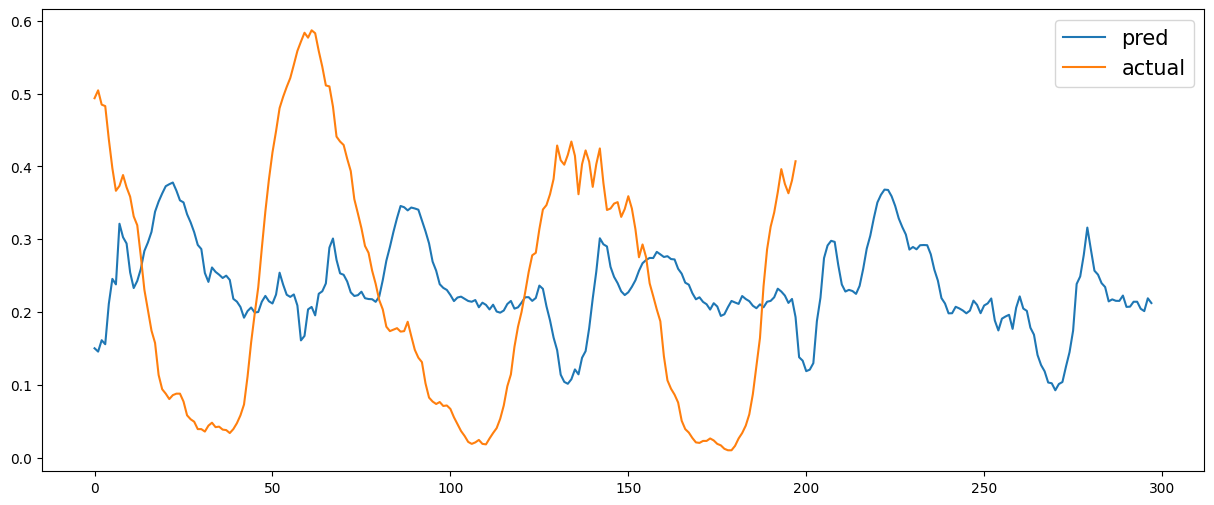

NameError: name 'lin_model_lazer' is not defined

<Figure size 640x480 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [49]:
plt.figure(figsize=(15,6))
plt.plot(temp_fx, label = 'pred')
plt.plot(testdata[:, -1], label = 'actual')
plt.legend()
plt.show()
plt.clf()

plt.figure(figsize=(15,6))
plt.plot(lin_model_lazer.evaluate_proposal(testdata, data[i].mean(axis=0)), label='linreg')
plt.plot(testdata[:, -1], label = 'actual')
plt.legend()
plt.show()
plt.clf()


[ 176.37069339   53.51957729   77.3739326    44.01731406    3.724235
  180.28139842  290.02346357  297.58194636   62.19164478   54.0622898
  133.62997983  145.02563965  114.80597112  194.47022937  119.48883618
  230.0130604   795.39401345  212.79628249  293.27310981  503.24043269
  300.50192832  601.44704526  327.47362775  577.0540339  1555.31657563
  105.57901657   63.25475519   51.96930643  310.15116623  307.04876195
   74.13906354]  Rhat
[ 202.84820512    9.88351213  180.96401946  142.76687884  155.84191687
   54.2426983    52.48863143  125.78058451  294.36692919   40.61676246
    6.98174487  110.2793607   580.55396449  209.9825906   353.11249357
  508.52040016  835.36075406  284.8155292    82.84667201  134.22800105
  656.52722395 1573.30370005 1005.19859978  693.5959547   715.15761278
   53.48412663    7.31180197   51.96205928   97.3462265     8.04546855
   75.0949119 ]  Rhat


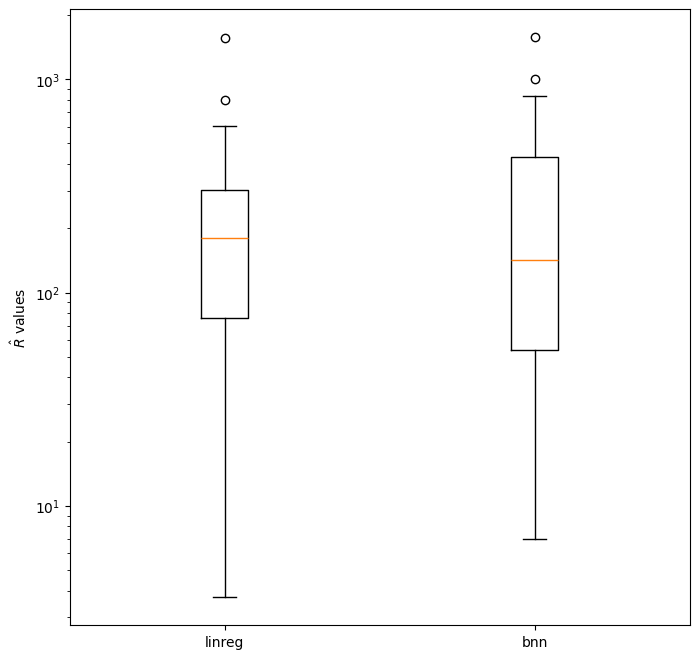

<Figure size 640x480 with 0 Axes>

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches((8,8))
ax.boxplot([gelman_rubin(data), gelman_rubin(data_bnn)])
ax.set_xticklabels(['linreg', 'bnn'])
ax.set_ylabel(r'$\hat{R}$ values')
ax.set_yscale('log')
plt.savefig("r_hat_distributions")
plt.show()
plt.clf()


# Iris

In [41]:
data  = np.genfromtxt('data/iris.csv',delimiter=';')
classes = data[:,4].reshape(data.shape[0],1)-1
features = data[:,0:4] #Normalizing Data

for k in range(4):
    mean = np.mean(features[:,k])
    dev = np.std(features[:,k])
    features[:,k] = (features[:,k]-mean)/dev
    train_ratio = 0.7 #choose
    indices = np.random.permutation(features.shape[0])
    traindata = np.hstack([features[indices[:np.int(train_ratio*features.shape[0])],:],classes[indices[:np.int(train_ratio*features.shape[0])],:]])
    testdata = np.hstack([features[indices[np.int(train_ratio*features.shape[0])]:,:],classes[indices[np.int(train_ratio*features.shape[0])]:,:]])
    activation = True
    
topology = [4, 1]

In [79]:
# load the trained weights
pos_run1 = np.loadtxt('result/Iris/linreg_pos_w_0.txt')
pos_run2 = np.loadtxt('result/Iris/linreg_pos_w_1.txt')  
pos_run3 = np.loadtxt('result/Iris/linreg_pos_w_2.txt')  
pos_run4 = np.loadtxt('result/Iris/linreg_pos_w_3.txt')  
pos_run5 = np.loadtxt('result/Iris/linreg_pos_w_4.txt') 

data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

print('gelman rubin - linreg')
print(np.sum(gelman_rubin(data) < 1.1, axis = 0))

gelman rubin - linreg
[ 1.00177039  1.00151383  1.0047393   1.00570279  1.00053893 10.58369633
  3.98818839]  Rhat
5


In [63]:
lin_model_iris = lin_model(0, traindata, testdata, topology[0], 0.1, True)
acc = np.empty(5)

for i in range(5):
   acc[i] = accuracy(np.rint(lin_model_iris.evaluate_proposal(testdata, data[i].mean(axis=0))), testdata[:, -1])
   

print('linreg mse: ', round(acc.mean(), 3), '%')

linreg mse:  98.077 %


In [99]:
pos_run1_bnn = np.loadtxt('result/Iris/pos_w_0.txt')
pos_run2_bnn = np.loadtxt('result/Iris/pos_w_1.txt')  
pos_run3_bnn = np.loadtxt('result/Iris/pos_w_2.txt')  
pos_run4_bnn = np.loadtxt('result/Iris/pos_w_3.txt')  
pos_run5_bnn = np.loadtxt('result/Iris/pos_w_4.txt') 

data_bnn = np.array([pos_run1_bnn, pos_run2_bnn, pos_run3_bnn, pos_run4_bnn, pos_run5_bnn])

In [100]:
print(np.sum(gelman_rubin(data_bnn) < 1.1, axis = 0))
print(gelman_rubin(data_bnn).shape)

[  1.06930707  14.95487155  27.98143472   6.00207244  11.48038469
   8.31407858   6.13162546   7.66704728  31.05122709  29.83555331
   8.20039279   2.36137439  45.81772345   5.19785134   3.56949537
   1.99809075  11.90173524   1.52717872  11.69630912  16.78966863
  30.28558687   2.50073766  10.71903273  10.03493333   7.40708457
  47.48958635  14.32142206  14.30406732  20.55700171  10.81576566
   8.36373368  21.49809519   1.91666368  14.08547448  35.75351692
   7.15550033   4.91270746  18.91032537  15.47608524  25.34249189
 102.21925778  17.98812363  16.0201632   24.58558037  21.9018303
  11.75383884  16.95949529  13.190218    40.83412704   3.59152394
   4.5503513    9.37633377  25.92773413  60.47151229   4.75167276
   1.29952537   9.14820081  18.93481842  23.53056922   7.48030185
  23.60278822  18.47908269  20.79921786  19.69844567  49.98329049
  48.85701837  27.9103992   20.48253845   9.01233089  10.09539349
  32.82515639  58.98305132  12.56743228  14.61256981  12.46736617
  12.698593

In [77]:
bnn_model_iris = Network([4, 12, 3], traindata, testdata, 0.01, 'classification')
acc_bnn = np.empty(5)


for i in range(5):
    temp_fx, temp_prob = bnn_model_iris.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    acc_bnn[i] = accuracy(temp_fx, testdata[:, -1])
    
print('bnn acc: ', round(acc_bnn.mean(), 3), '%')


bnn acc:  97.692 %


# Ionosphere

In [86]:
traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
topology = [34, 2]

In [3]:
# load the trained weights
pos_run1 = np.loadtxt('result/Ionosphere/linreg_pos_w_0.txt')
pos_run2 = np.loadtxt('result/Ionosphere/linreg_pos_w_1.txt')  
pos_run3 = np.loadtxt('result/Ionosphere/linreg_pos_w_2.txt')  
pos_run4 = np.loadtxt('result/Ionosphere/linreg_pos_w_3.txt')  
pos_run5 = np.loadtxt('result/Ionosphere/linreg_pos_w_4.txt') 

data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

print('gelman rubin - linreg')
print(np.sum(gelman_rubin(data) < 1.1, axis = 0))

gelman rubin - linreg
[1.01163415 4.05247841 1.0632517  1.04889994 1.02292079 1.05399461
 1.02280023 1.00735723 1.04499128 1.02813033 1.02965393 1.02298868
 1.07647553 1.06703633 1.07015928 1.0573302  1.06403764 1.02947426
 1.12669164 1.03417269 1.01801087 1.01429649 1.02760541 1.02188138
 1.04287866 1.03318328 1.06085663 1.02781248 1.02188846 1.0207723
 1.02136437 1.01196906 1.06591595 1.0619136  1.02589879 4.54998463]  Rhat
33


In [88]:
lin_model_ionosphere = lin_model(0, traindata, testdata, topology[0], 0.1, True)
acc = np.empty(5)

for i in range(5):
   acc[i] = accuracy(np.rint(lin_model_ionosphere.evaluate_proposal(testdata, data[i].mean(axis=0))), testdata[:, -1])
   

print('linreg mse: ', round(acc.mean(), 3), '%')

linreg mse:  89.174 %


In [4]:
pos_run1_bnn = np.loadtxt('result/Ionosphere/pos_w_0.txt')
pos_run2_bnn = np.loadtxt('result/Ionosphere/pos_w_1.txt')  
pos_run3_bnn = np.loadtxt('result/Ionosphere/pos_w_2.txt')  
pos_run4_bnn = np.loadtxt('result/Ionosphere/pos_w_3.txt')  
pos_run5_bnn = np.loadtxt('result/Ionosphere/pos_w_4.txt') 

data_bnn = np.array([pos_run1_bnn, pos_run2_bnn, pos_run3_bnn, pos_run4_bnn, pos_run5_bnn])

In [5]:
print(np.sum(gelman_rubin(data_bnn) < 1.1, axis = 0))
print(gelman_rubin(data_bnn).shape)

[ 3.84436224 25.72654746 22.43359875 ...  8.36151172 16.06274081
 17.9338533 ]  Rhat
0
[ 3.84436224 25.72654746 22.43359875 ...  8.36151172 16.06274081
 17.9338533 ]  Rhat
(1852,)


In [98]:
bnn_model_iris = Network([34, 50, 2], traindata, testdata, 0.01, 'classification')
acc_bnn = np.empty(5)

for i in range(5):
    temp_fx, temp_prob = bnn_model_iris.evaluate_proposal(testdata, data_bnn[i].mean(axis=0))
    acc_bnn[i] = accuracy(temp_fx, testdata[:, -1])
    
print('bnn acc: ', round(acc_bnn.mean(), 3), '%')

bnn acc:  93.761 %


# Summary
---
All results are based on the average results of 5 independently trained models.

(Gelman & Rubin, 1992) $\sqrt{\hat{R}} = \sqrt{(\frac{n-1}{n} + \frac{m+1}{mn}\frac{B}{W}) \frac{df}{df-2}}$

|  Problem                      | testdata MSE/accuracy (linreg) | testdata MSE/accuracy (BNN)    | number of weights with $\hat{R} < 1.1$ (linreg) | number of weights with $\hat{R} < 1.1$ (BNN) | 
| ---                           | :---:                          |   :---:       | :---: |  :---: |
| Lazer (regression)            | 0.004889619                    | 0.0006183606  | 1/5   | 0/31   |
| Sunspot (regression)          | 0.0012832341                   | 0.0001883603  | 1/5   | 0/31   |
| Iris (classification)         | 98.077 %                       | 97.692 %      | 5/7   | 1/99   |
| Ionosphere (classification)   | 89.174 %                       | 93.761 %      | 33/34 | 0/1852 |



Using a sample size of 50000, in the cases of Bayesian linear regression, most weights give very small $\hat{R}$. For example, in the Lazer and Sunspot problem, although only one of the weights give a value of less than 1.1, the other values are still relatively small (all of which are less than 1.3). On the other hand, while the Bayesian neural network performs better in predicting the results, as shown by a smaller MSE, the $\hat{R}$ value is much larger for all weights, as there is only one value less than ten, and most values are larger than 100. This is also the case for all other problems.